<a href="https://colab.research.google.com/github/Fiona-cherutto/Standard_Bank_Credit_Home_Loans_Prediction_AutoML_vs_Bespoke_ML/blob/main/Standard_Bank_Credit_Home_Loans_AutoML_vs_Bespoke_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

Will follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

Using CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. 

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [ ]:
!pip install sweetviz 
#uncomment the above if you need to install the library 
!pip install auto-sklearn
#uncomment the above if you need to install the library 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

for _ in range(3):
    try:
        import autosklearn.classification
        break
    except:
        pass
else:
    raise ImportError("failed to import from autosklearn")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (449 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontE

In [ ]:
!pip install "dask[dataframe]" --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Part One

## EDA

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


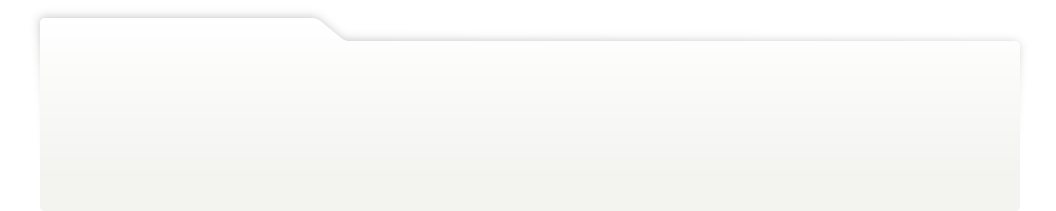
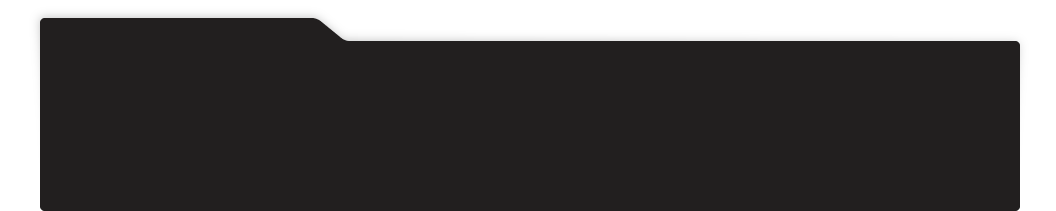
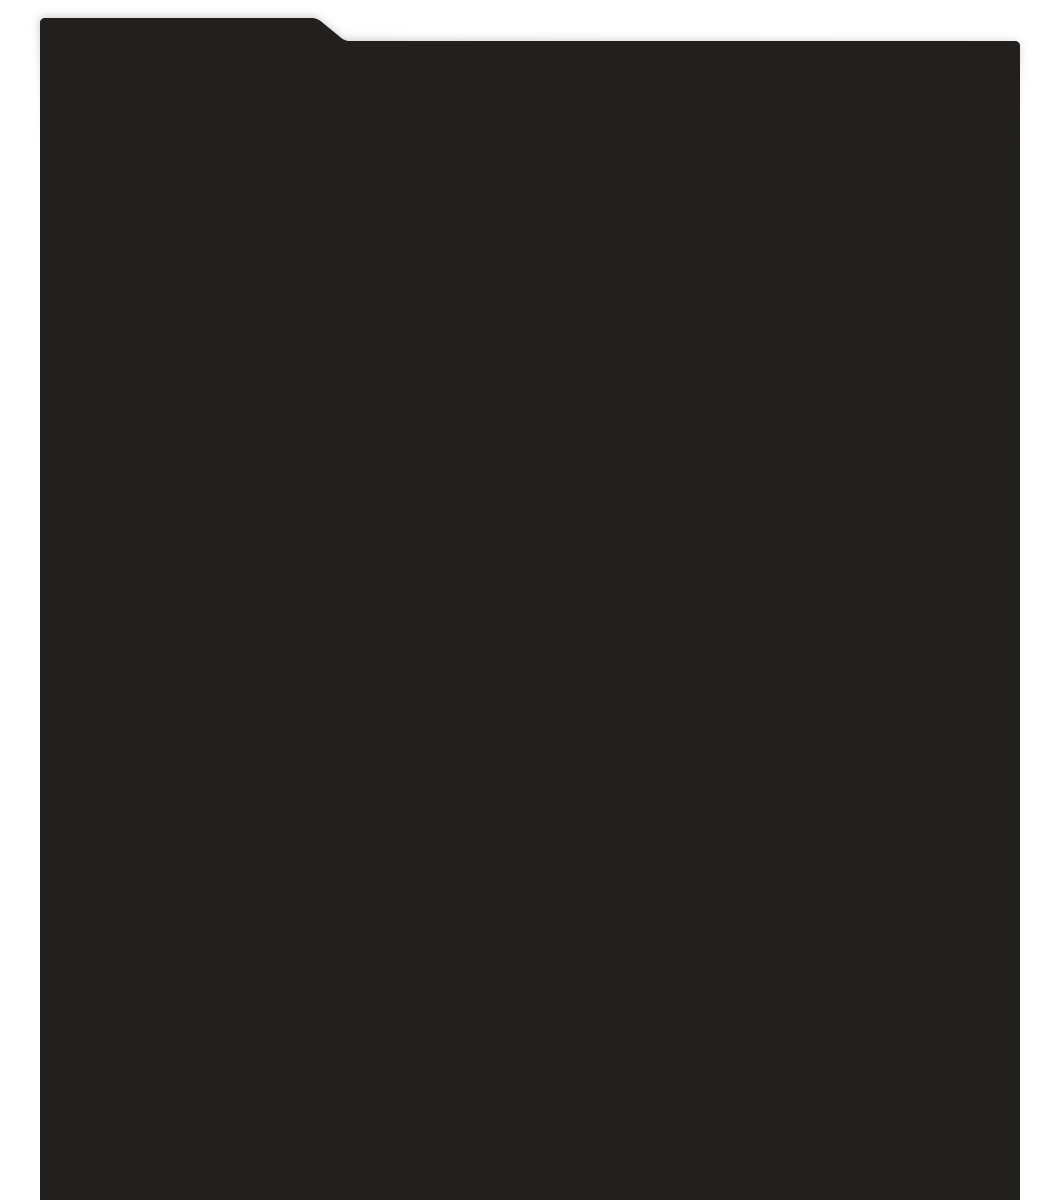
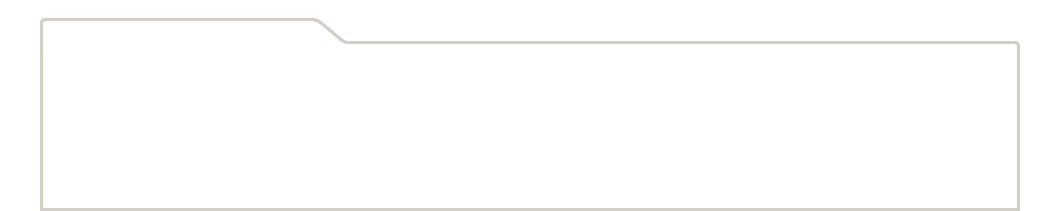
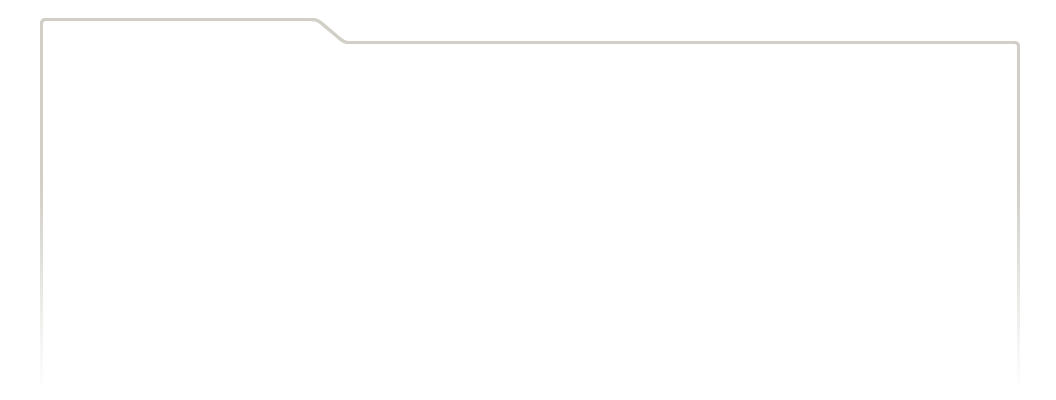
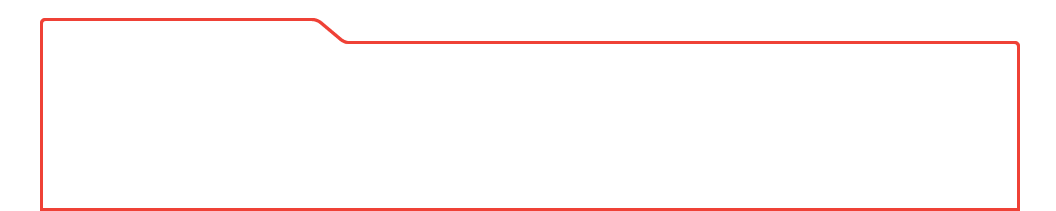
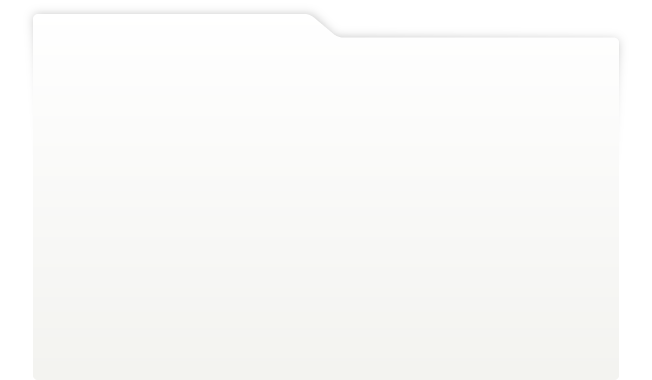
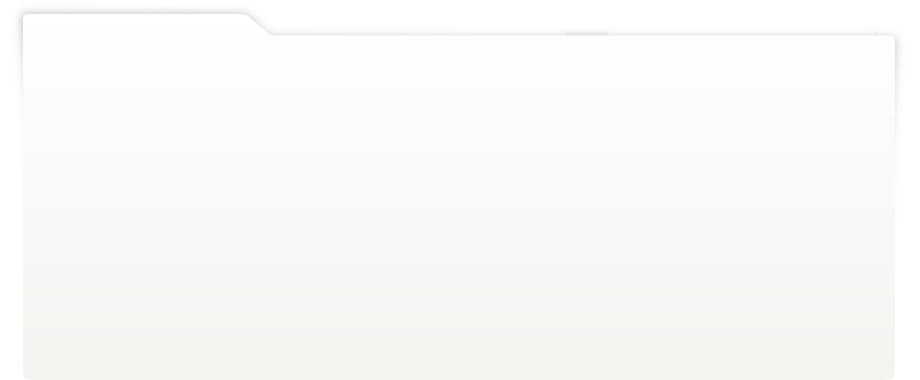
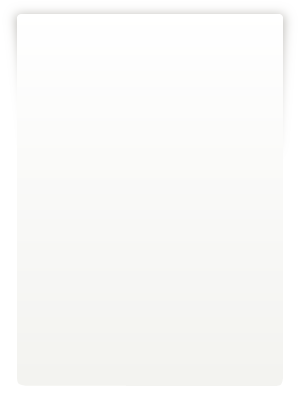
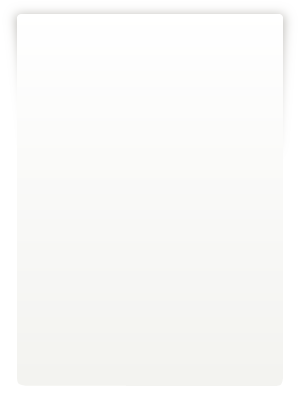
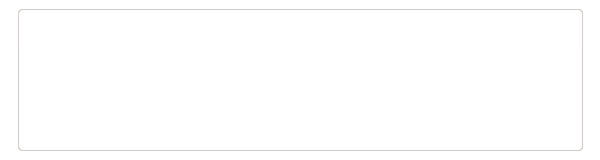
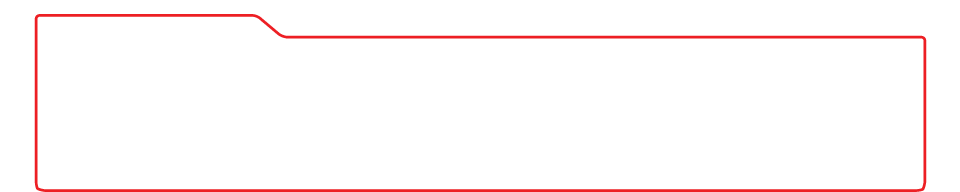
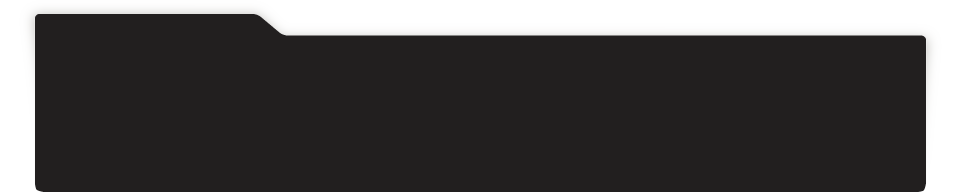
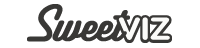
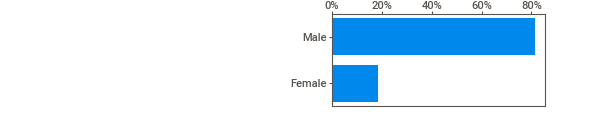
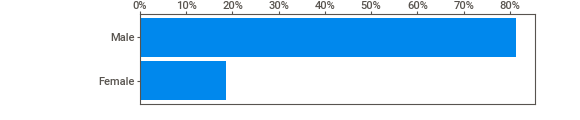
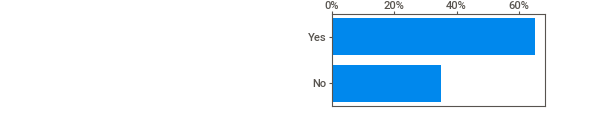
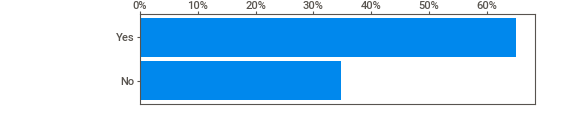
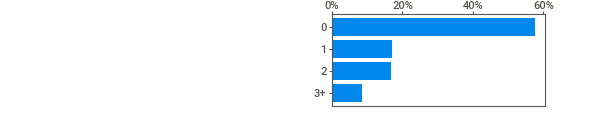
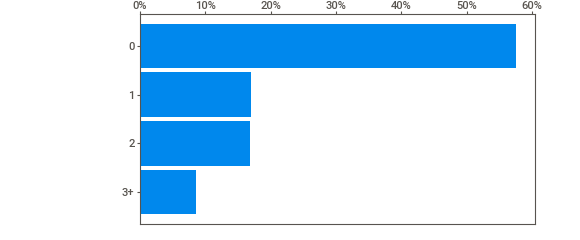
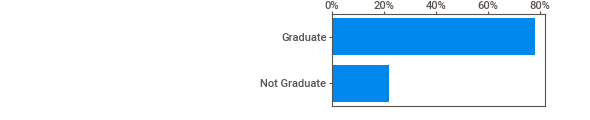
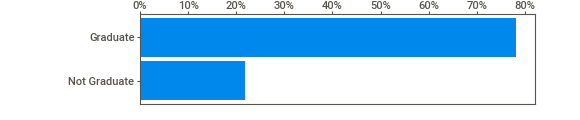
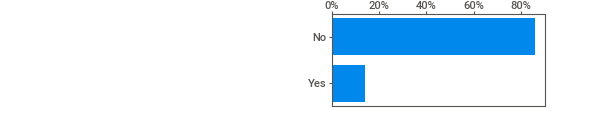
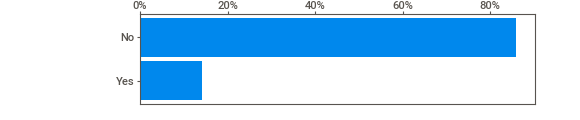
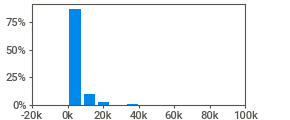
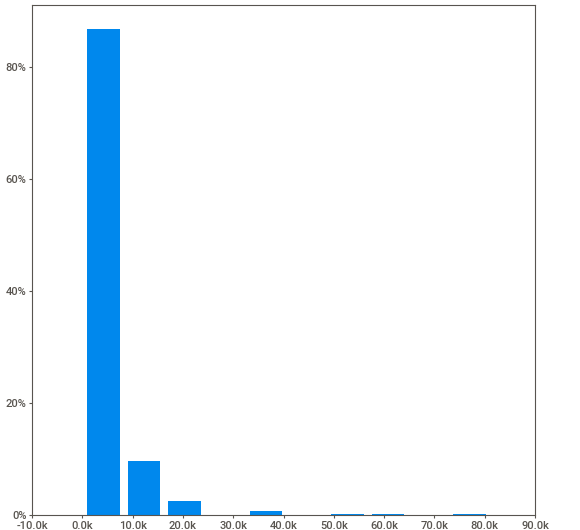
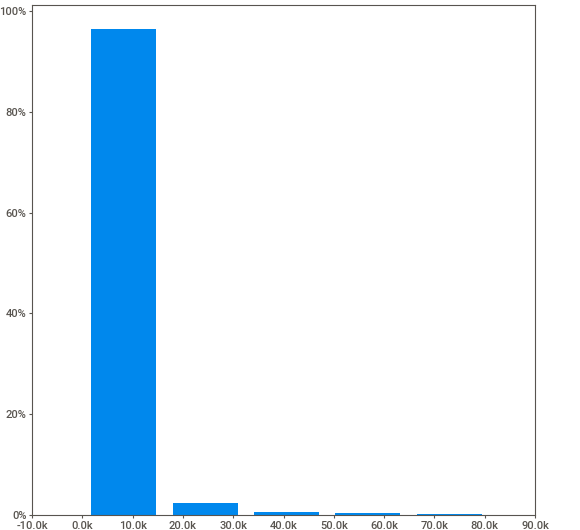
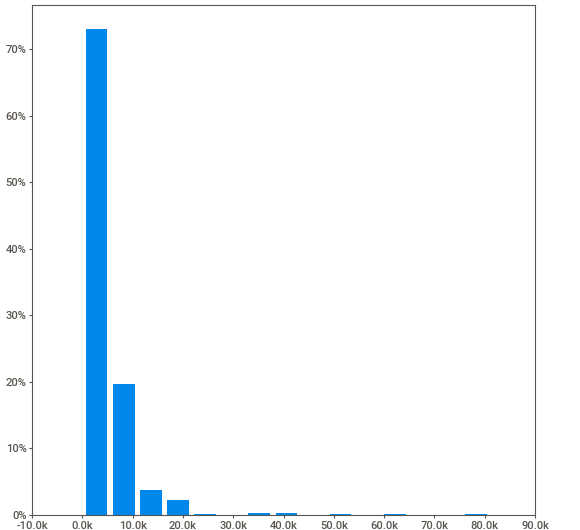
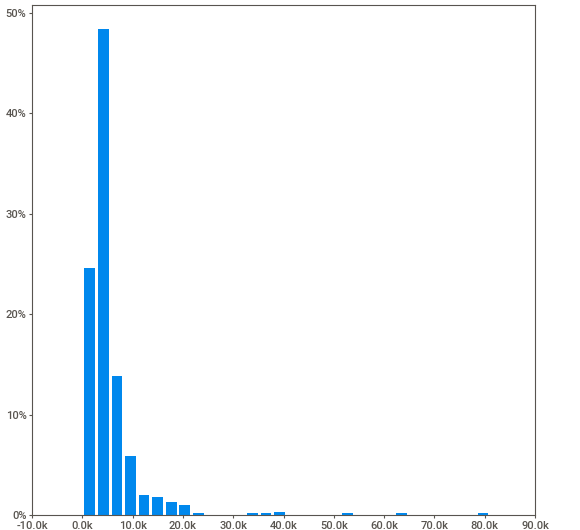
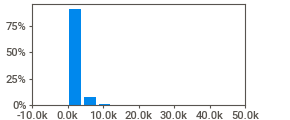
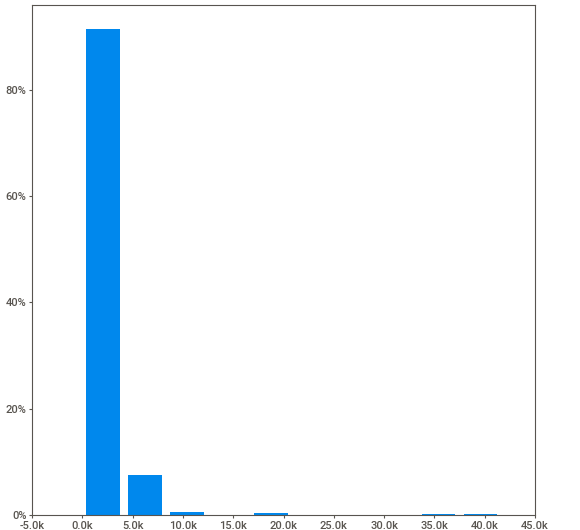
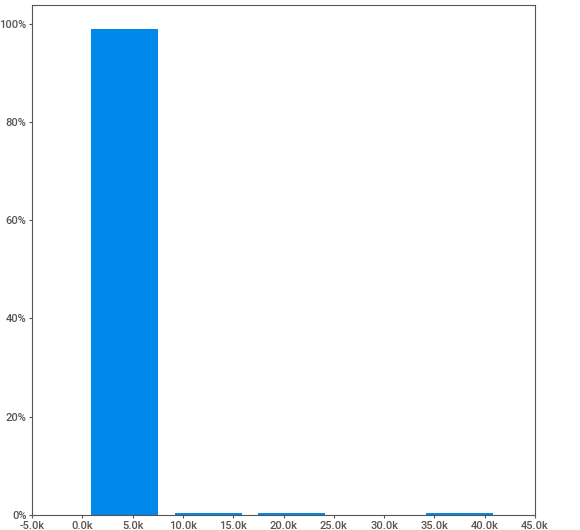
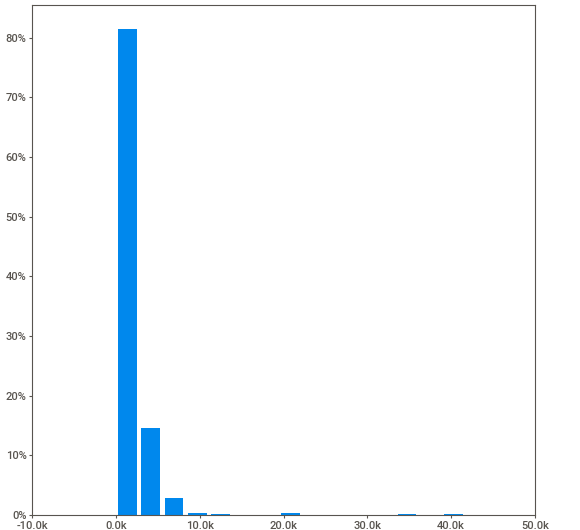
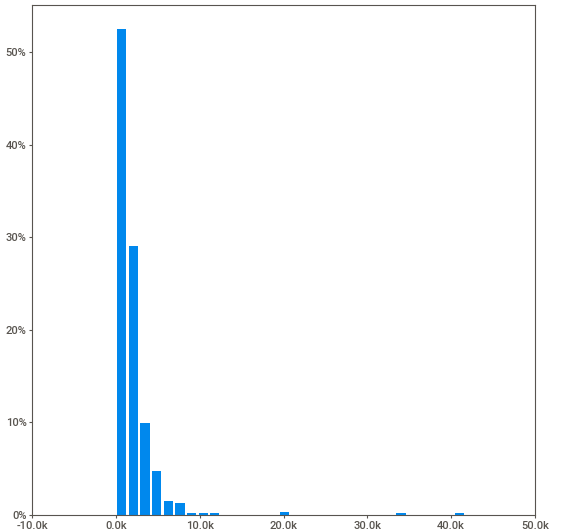
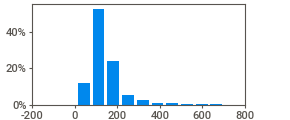
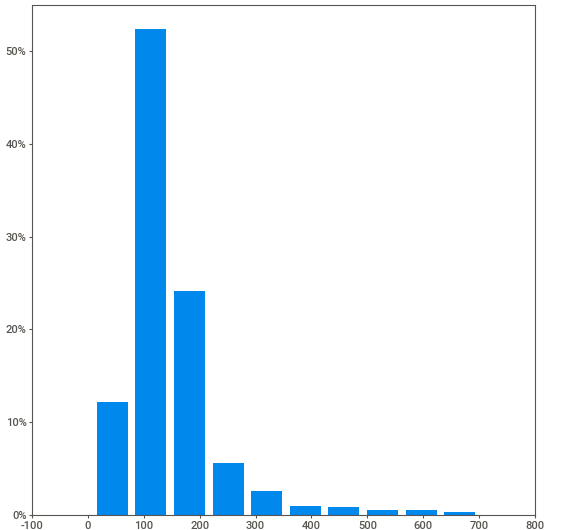
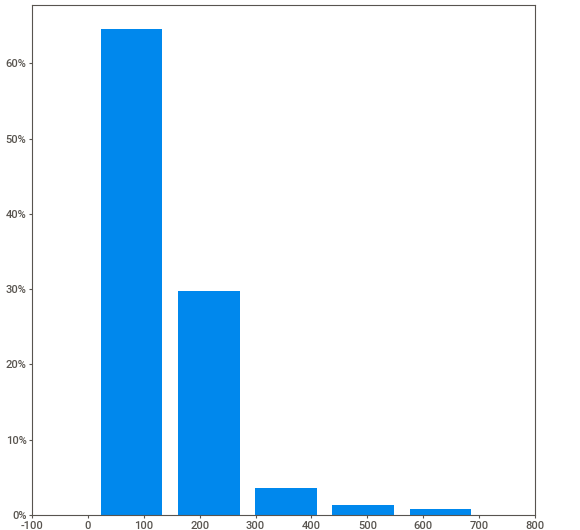
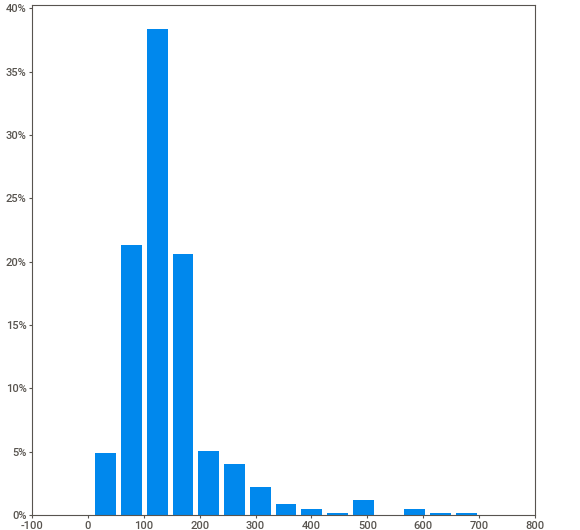
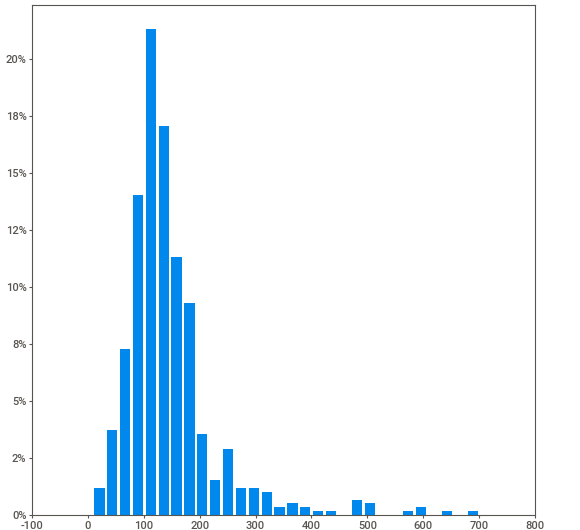
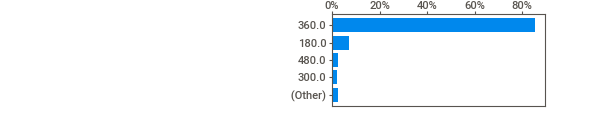
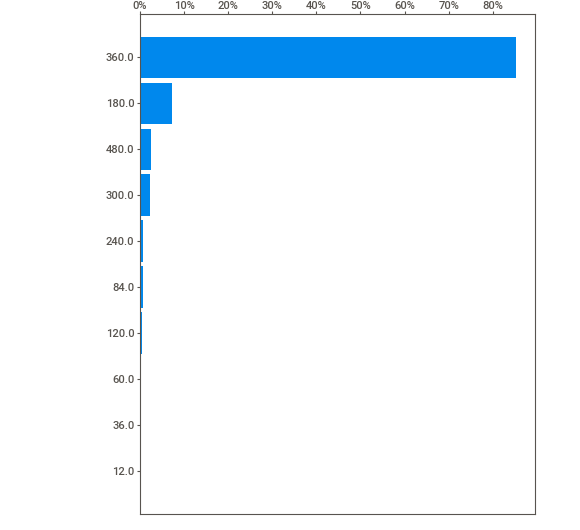
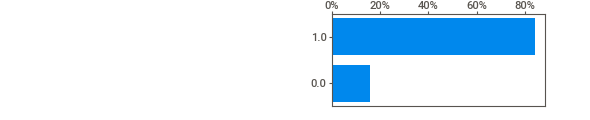
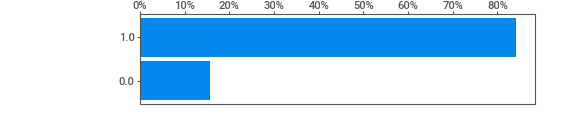
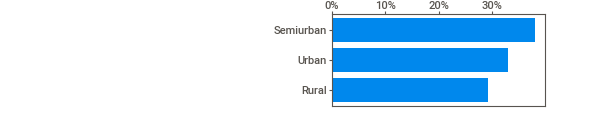
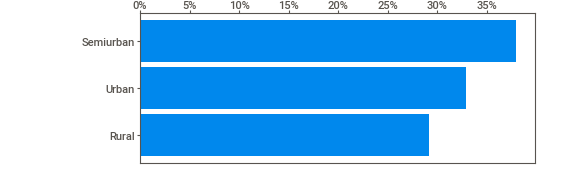
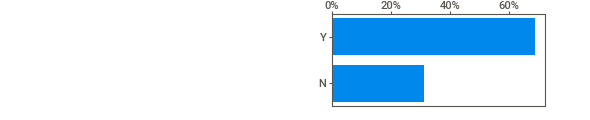
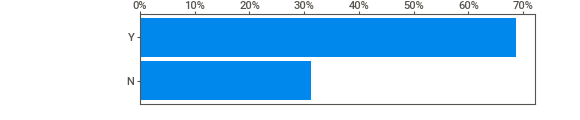
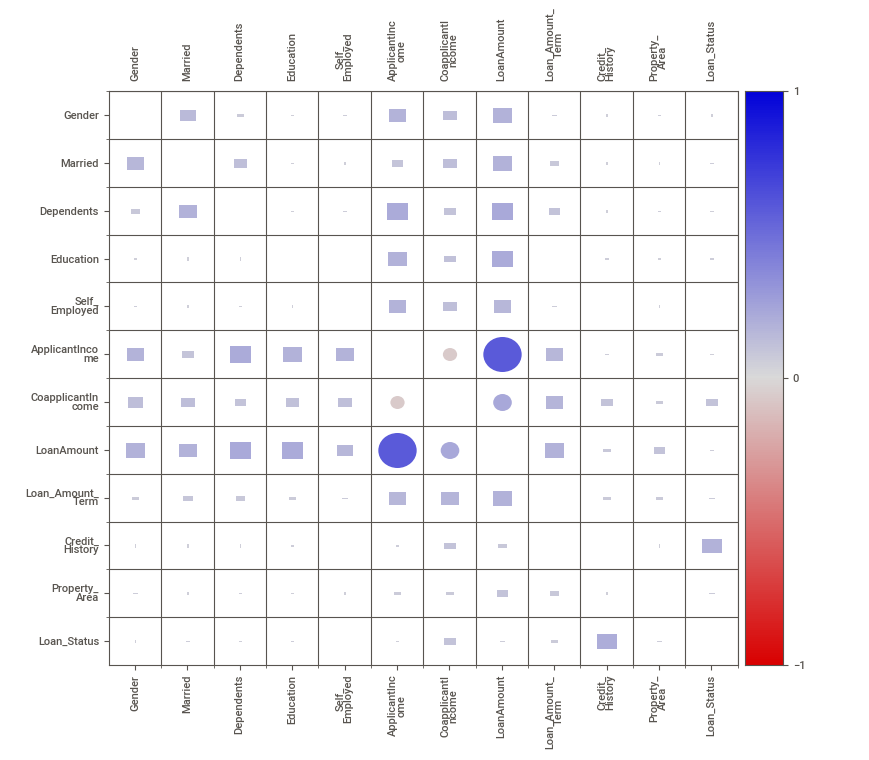
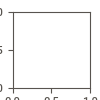

In [ ]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA 


## Analysis Hypothesis Generation

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

## 3. Checking the Data

In [ ]:
#priview data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#priview data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Previewing the bottom of our dataset
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
# Determining the no. of records in our dataset
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in []]
print(f'\nThe dataset contains {len(features)} features')


Train contains 614 samples and 13 variables

Test contains 367 samples and 12 variables

The dataset contains 13 features


In [ ]:
# Checking whether each column has an appropriate datatype
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Checking whether each column has an appropriate datatype
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

## 3. Tidying the Dataset

In [ ]:
#cheacking Anomalies
q1_ApplicantIncome = train['ApplicantIncome'].quantile(.25)
q3_ApplicantIncome = train['ApplicantIncome'].quantile(.75)

iqr_ApplicantIncome = q3_ApplicantIncome - q1_ApplicantIncome


q1_CoapplicantIncome = train['CoapplicantIncome'].quantile(.25)
q3_CoapplicantIncome = train['CoapplicantIncome'].quantile(.75)

iqr_CoapplicantIncome = q3_CoapplicantIncome - q1_CoapplicantIncome

q1_LoanAmount = train['LoanAmount'].quantile(.25)
q3_LoanAmount = train['LoanAmount'].quantile(.75)

iqr_LoanAmount = q3_LoanAmount- q1_LoanAmount

q1_Loan_Amount_Term  = train['Loan_Amount_Term'].quantile(.25)
q3_Loan_Amount_Term  = train['Loan_Amount_Term'].quantile(.75)

iqr_Loan_Amount_Term  = q3_Loan_Amount_Term  - q1_Loan_Amount_Term 


q1_Credit_History = train['Credit_History'].quantile(.25)
q3_Credit_History = train['Credit_History'].quantile(.75)

iqr_Credit_History = q3_Credit_History - q1_Credit_History

q1_3, q3_3 = np.percentile(train['ApplicantIncome'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_ApplicantIncome - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)

print(iqr_ApplicantIncome, iqr)

2917.5 2917.5


In [ ]:
#cheaking outliers and removing
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)  
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'financial_out'
# ---
# 
financial_out = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(financial_out.shape)

# Printing the shape of our old dataset
# ---
#
print(train.shape)

(398, 13)
(614, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


In [ ]:
# cheaking for the Missing Data
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# cheaking for the Missing Data
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
# Droppping all 
train = train.dropna()
print(train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

In [ ]:
# Droppping all 
test = test.dropna()
print(test)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
5    LP001054   Male     Yes          0  Not Graduate           Yes   
..        ...    ...     ...        ...           ...           ...   
361  LP002969   Male     Yes          1      Graduate            No   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

In [ ]:
train.duplicated().any()

False

In [ ]:
test.duplicated().any()

False

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


### Target Distribution
This is a binary classification problem. Lets have a look at the number of of people with bank loan and those with no bank loan. 

In [ ]:
train['Loan_Status'] = train['Loan_Status'].fillna(0)
#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
train['Loan_Status']=train['Loan_Status'].replace(['N', 'Y'],[0 ,1 ])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [ ]:
train['Loan_Status'].replace(['No','Yes'],[0 , 1])

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [ ]:
Bank_Loan  =  'Loan_Status'

In [ ]:
train[Bank_Loan].value_counts(normalize=True)

1    0.691667
0    0.308333
Name: Loan_Status, dtype: float64

Lets visualize the same target distribution in a countplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


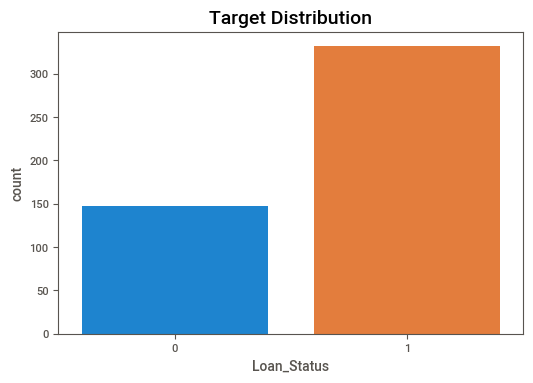

In [ ]:
_ = sns.countplot(train[Bank_Loan])
_ = plt.title("Target Distribution", fontsize=14)

In [ ]:
train.nunique()

Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 68.7+ KB


In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Segregating Categorical & Numerical Variables

In [ ]:
num_cols =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Loan_ID']

In [ ]:
id_cols =['Loan_ID']

In [ ]:
#train['Loan_ID']= train['Loan_ID'].replace([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cate_cols = [c for c in features if c not in num_cols]
cate_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
num_cols =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

# Univariate Analysis

## Analysis Hypothesis Generation


4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

## Numerical Features
### 1. Univariate Analysis - Boxplots

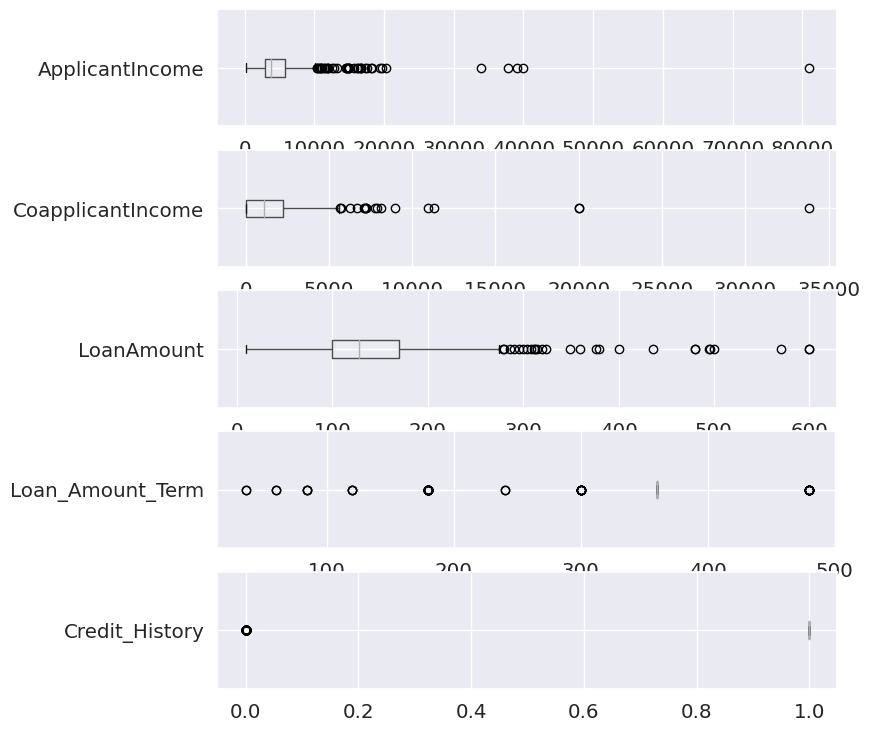

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(8, 9))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)



### 2. Univariate Analysis - Density Plots

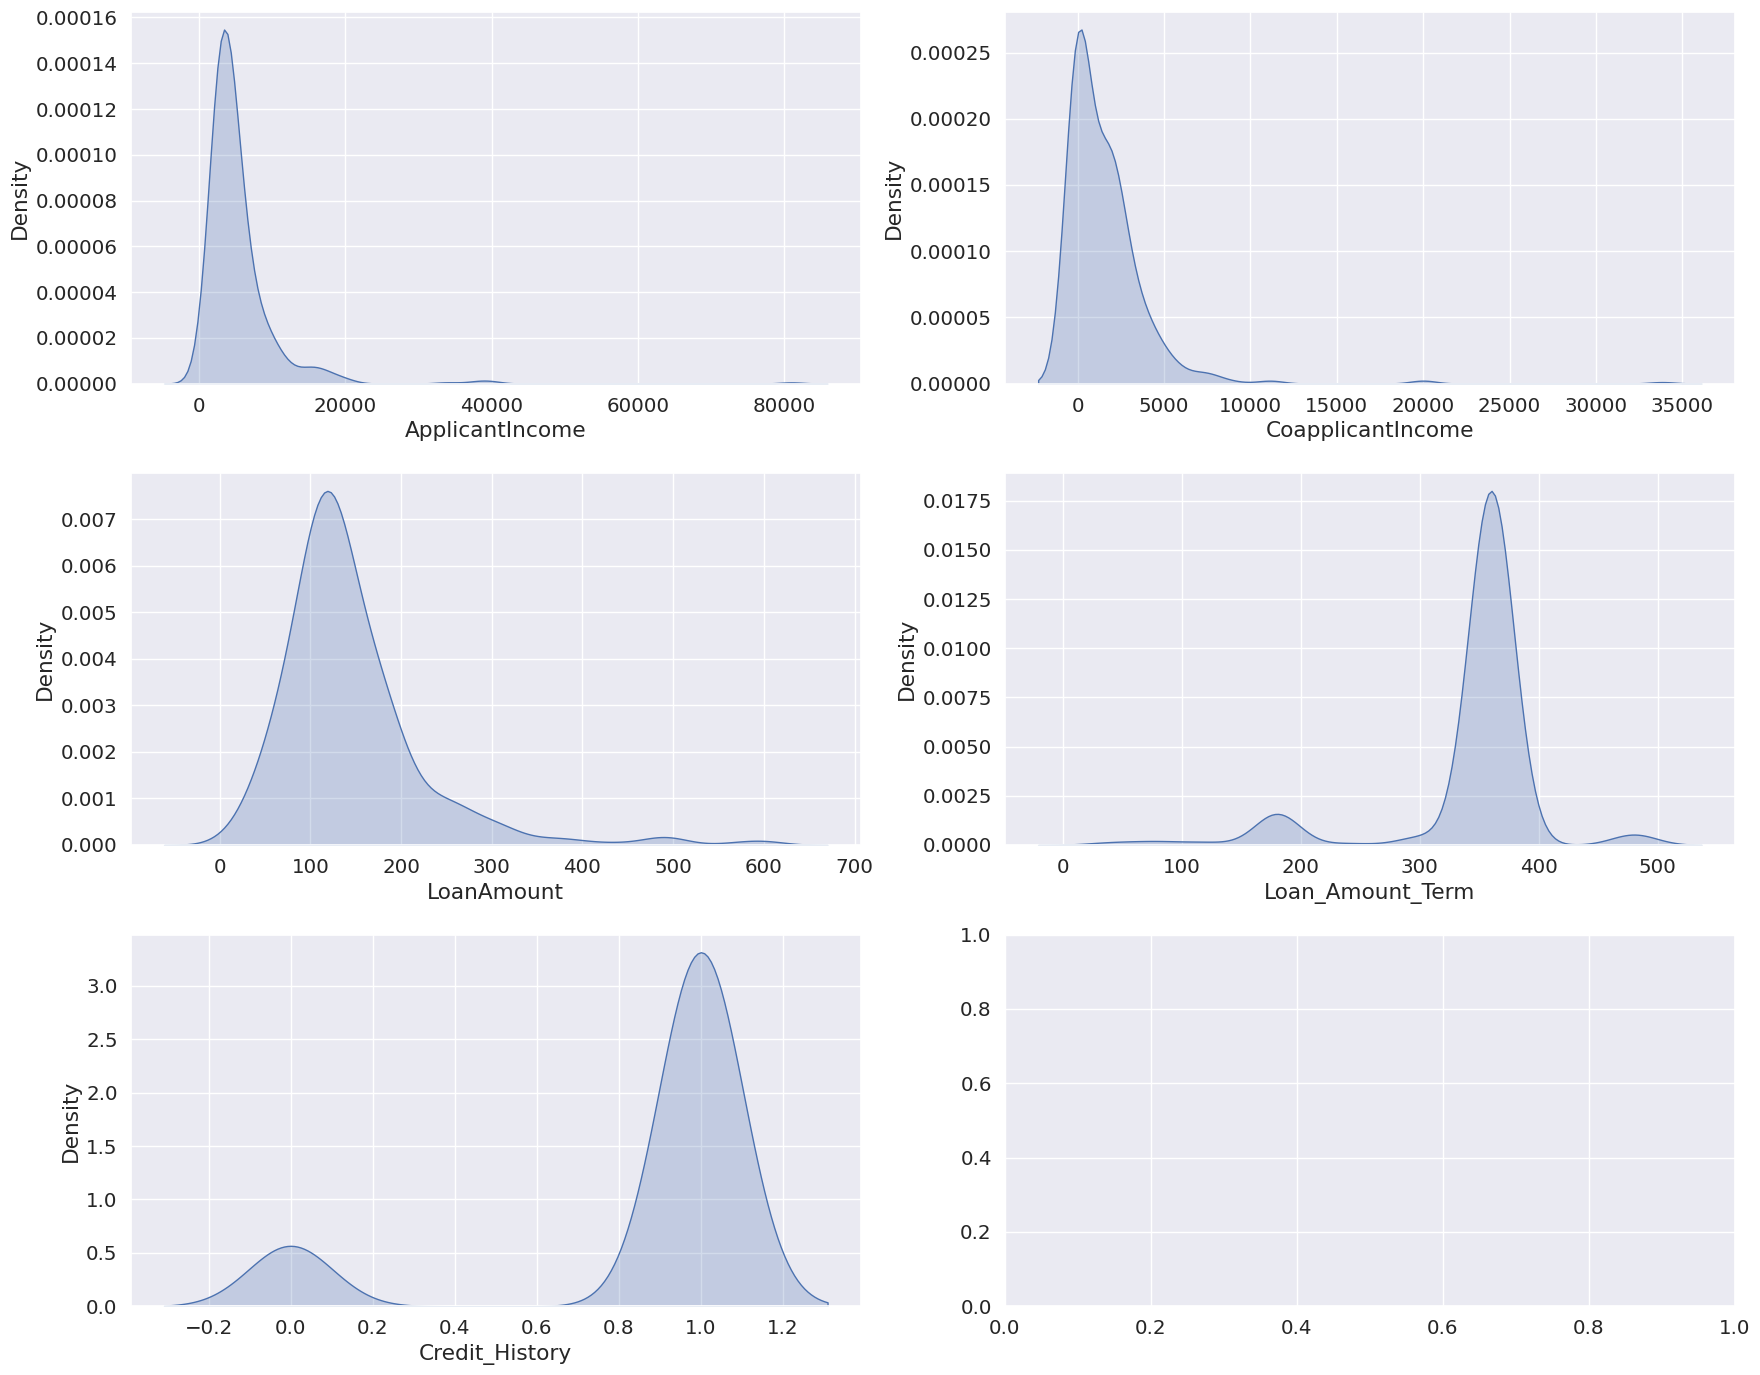

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

###3. Measures of Central Tendency

In [ ]:
# Finding the mean
train.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


ApplicantIncome      5364.231250
CoapplicantIncome    1581.093583
LoanAmount            144.735417
Loan_Amount_Term      342.050000
Credit_History          0.854167
Loan_Status             0.691667
dtype: float64

In [ ]:
# Finding the median
train.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ApplicantIncome      3859.0
CoapplicantIncome    1084.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
Loan_Status             1.0
dtype: float64

### 4. Measures of Dispersion

In [ ]:
# Finding the standard deviation
train.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ApplicantIncome      5668.251251
CoapplicantIncome    2617.692267
LoanAmount             80.508164
Loan_Amount_Term       65.212401
Credit_History          0.353307
Loan_Status             0.462287
dtype: float64

In [ ]:
# Finding the min and max values of the householeds average prices
train_max = train["LoanAmount"].max()
train_min = train["LoanAmount"].min()

# Calculating the range
train_max - train_min

591.0

In [ ]:
# Finding the quantiles of the herbicide average prices
train.quantile([0.25,0.5,0.75])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0.25,2898.75,0.00,100.0,360.0,1.0,0.0
0.50,3859.00,1084.50,128.0,360.0,1.0,1.0
0.75,5852.50,2253.25,170.0,360.0,1.0,1.0


In [ ]:
# Determining the skeweness
train.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Loan_Status         -0.832681
dtype: float64

In [ ]:
# Determining the Kurtosis 
train.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ApplicantIncome      74.063152
CoapplicantIncome    57.658049
LoanAmount            8.502723
Loan_Amount_Term      6.362722
Credit_History        2.061763
Loan_Status          -1.312128
dtype: float64

In [ ]:
# Example 7: Displaying the summary statistics of the dataframe
#
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000


### 5. Frequency table

In [ ]:
# Creating our frequency table
# ---
train.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

# Categorical Features
### 1. Univariate Analysis - Pie Charts.
Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

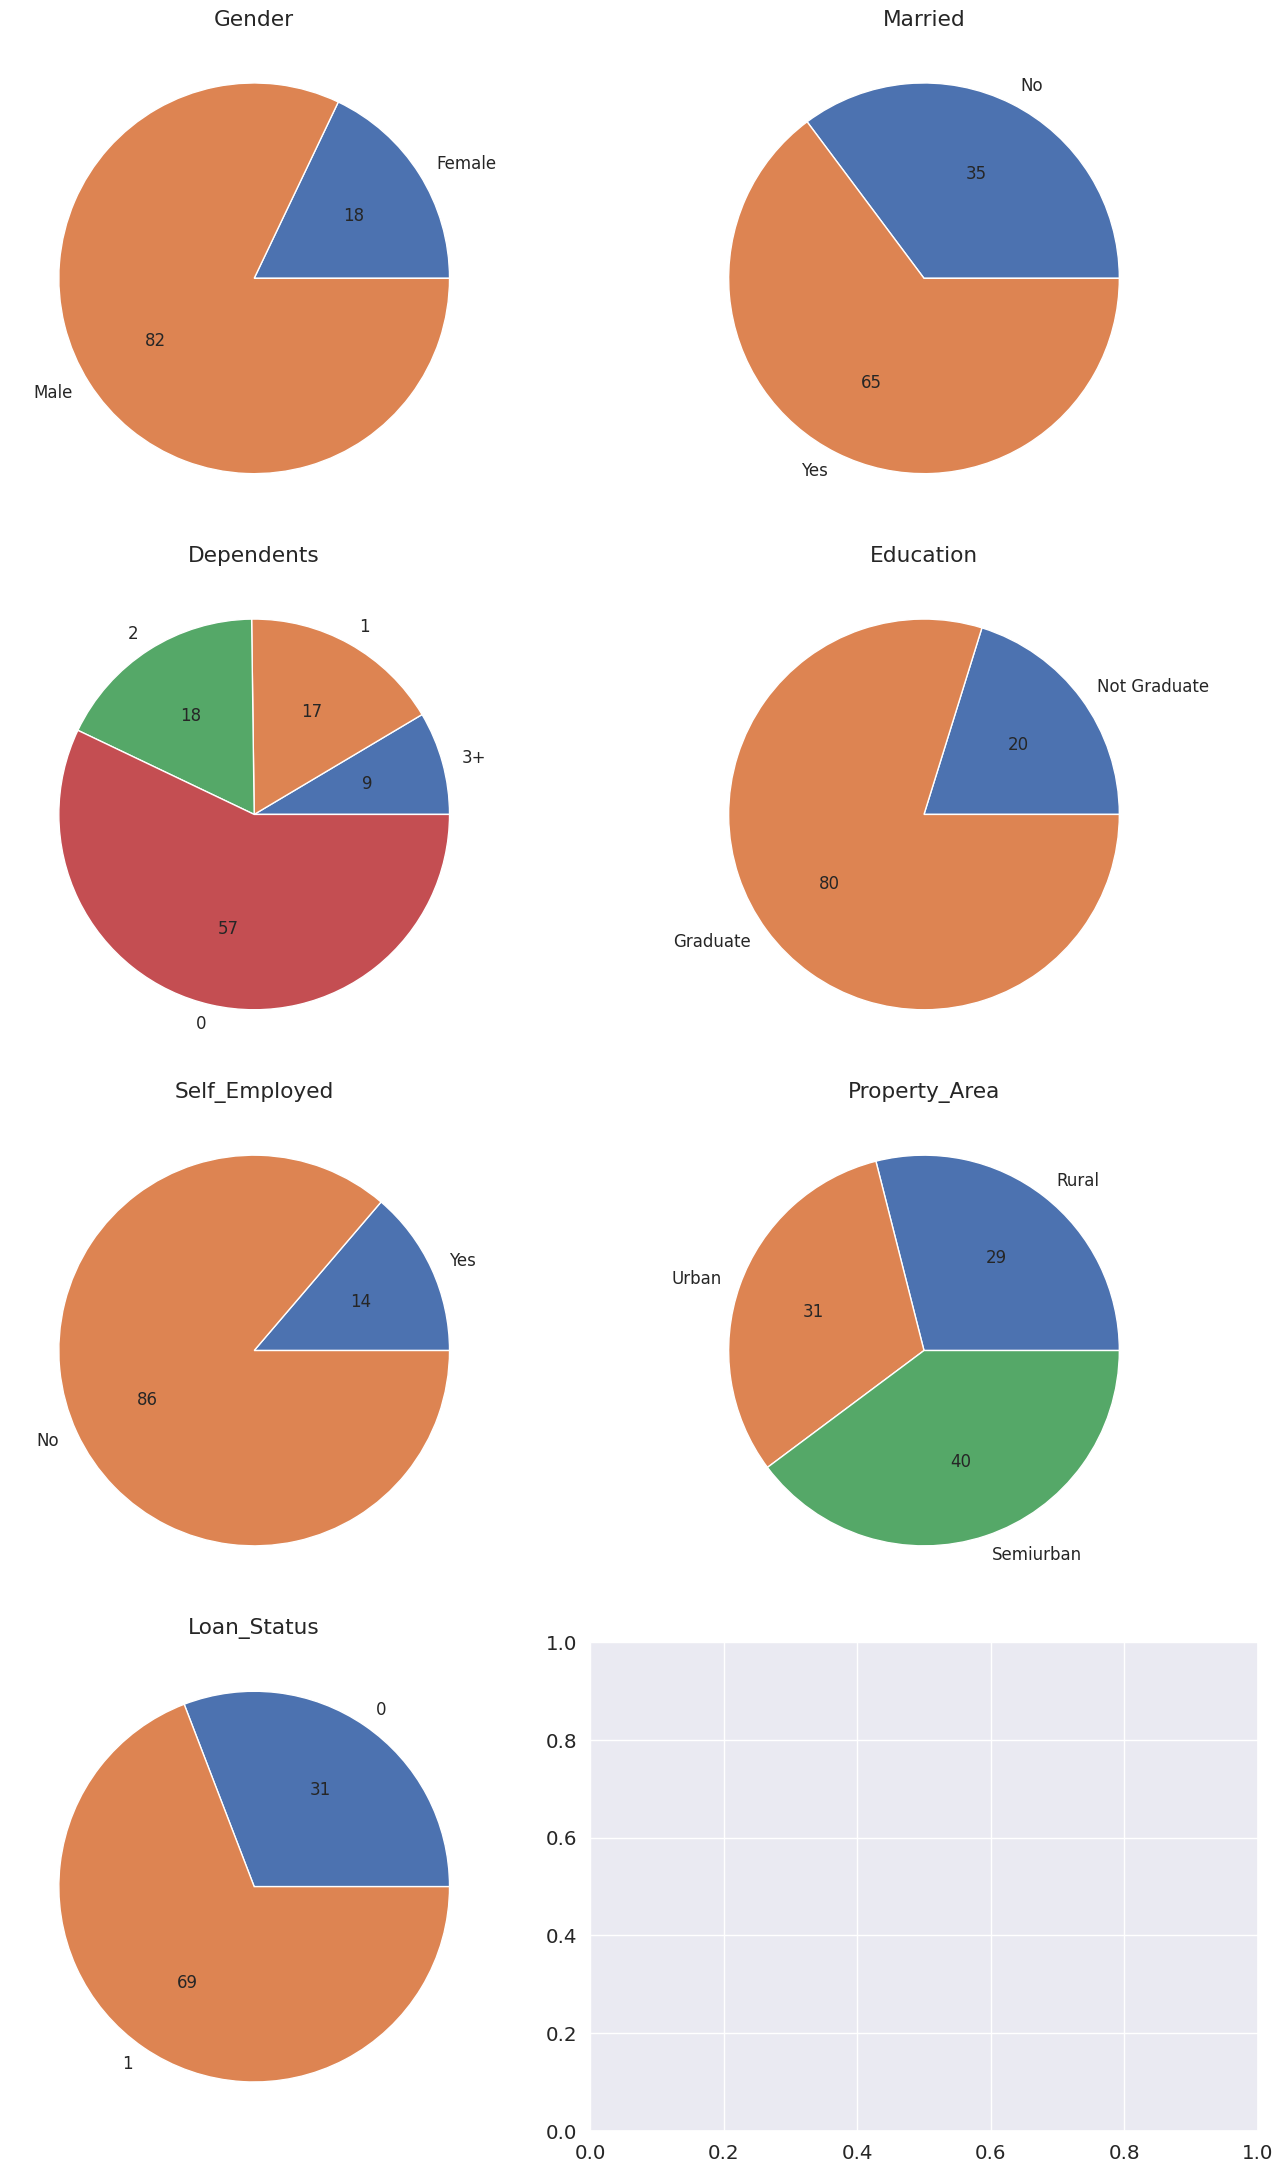

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cate_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

### 2. Univariate Analysis - CountPlots.

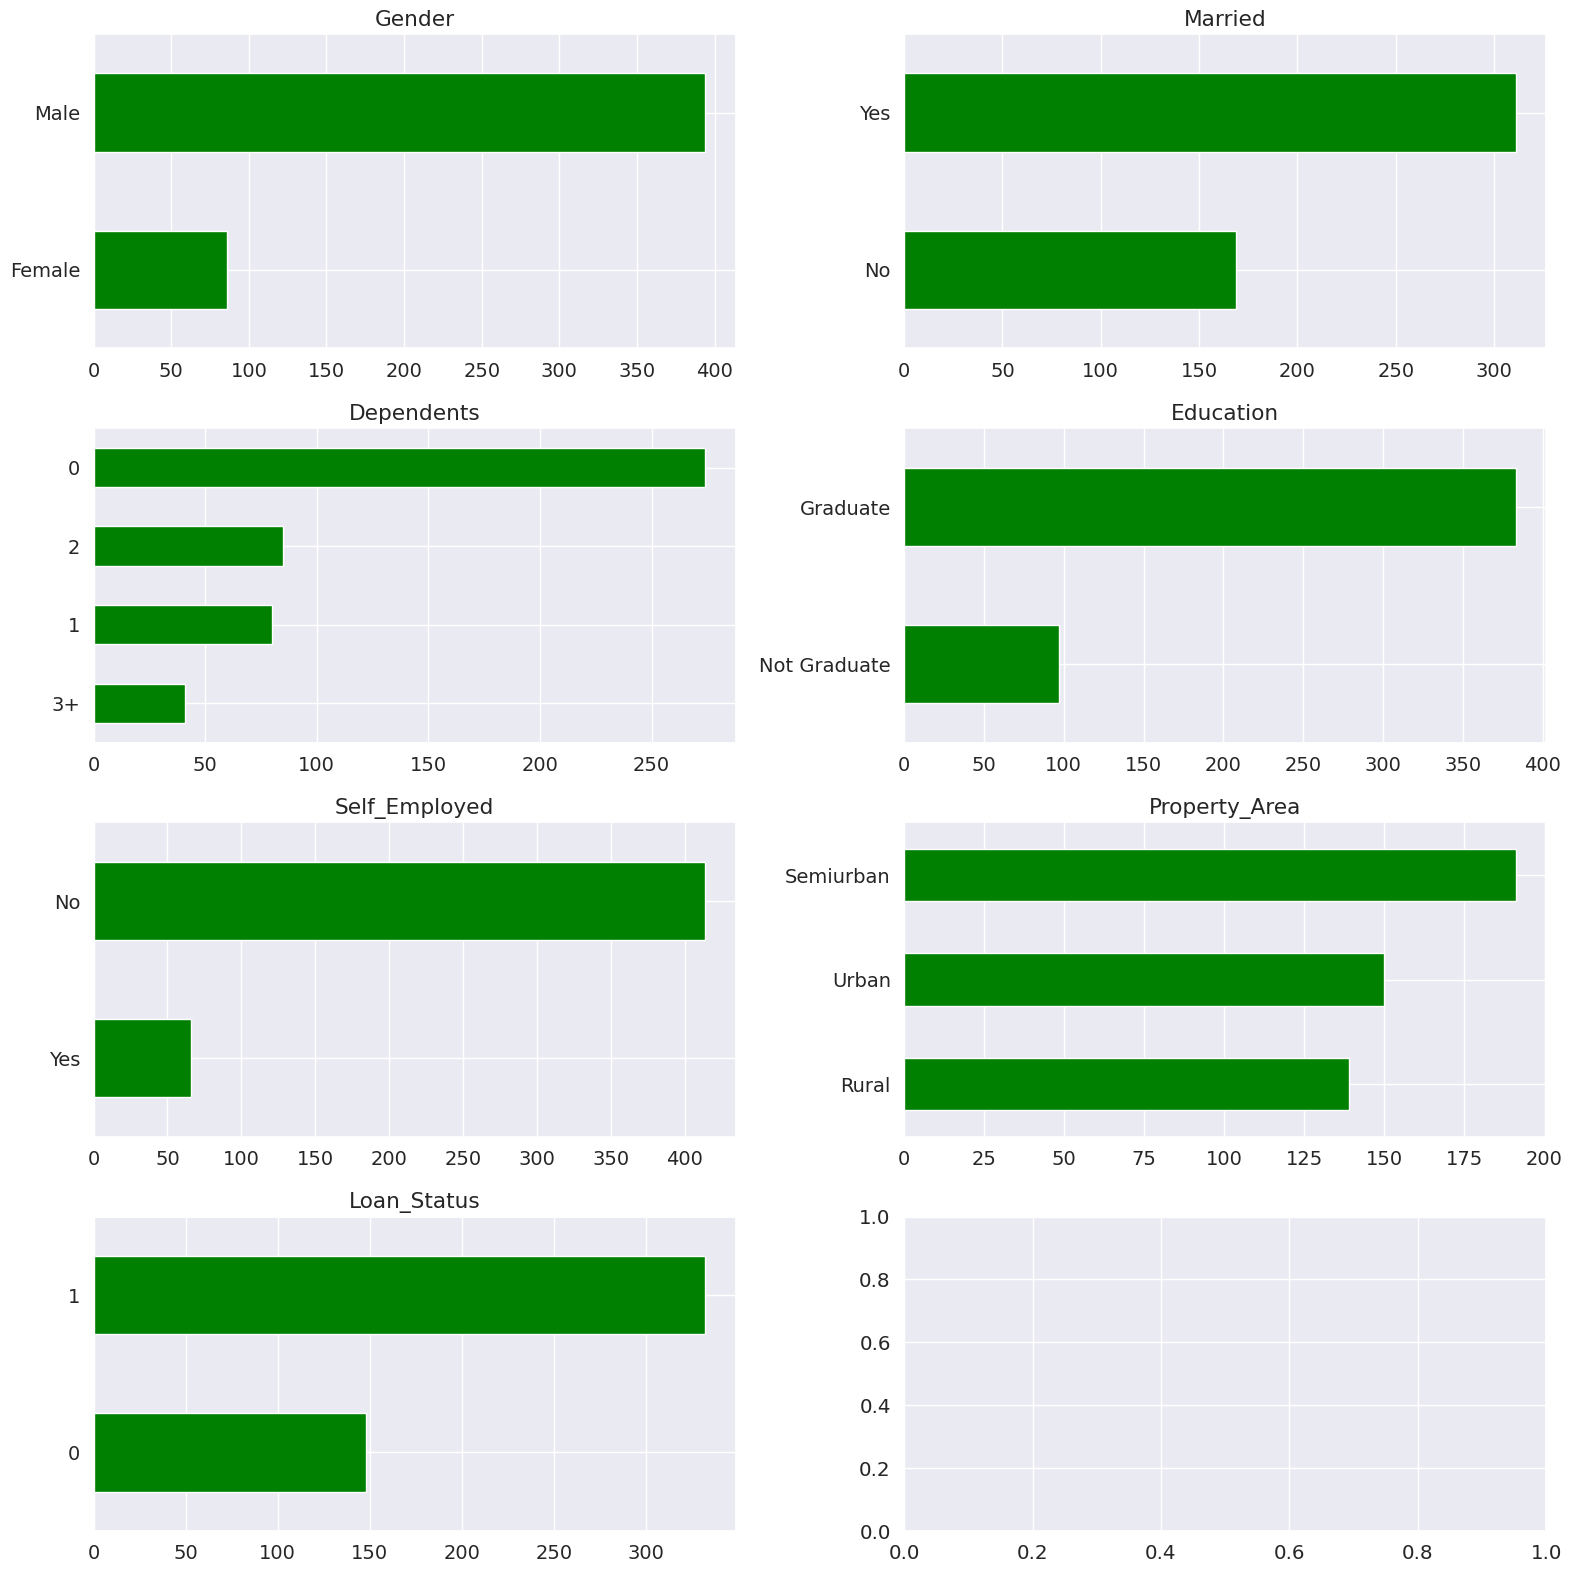

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cate_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14,color = 'green')
    
_ = plt.tight_layout()

# Bivariate Analysis

## Numerical and Numerical

### 1. Scatter Plots

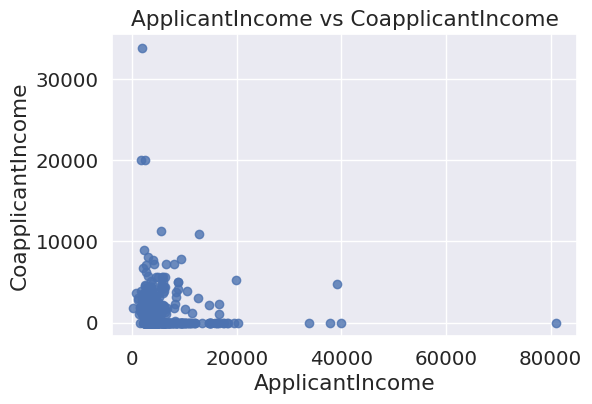

In [ ]:
# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = train["ApplicantIncome"], y = train["CoapplicantIncome"], fit_reg=False)
# Giving our scatterplot a title
plt.title('ApplicantIncome vs CoapplicantIncome')

# Labelling our x axis
plt.xlabel('ApplicantIncome')

# Labelling our y axis
plt.ylabel('CoapplicantIncome')

# Displaying our scatterplot
plt.show()


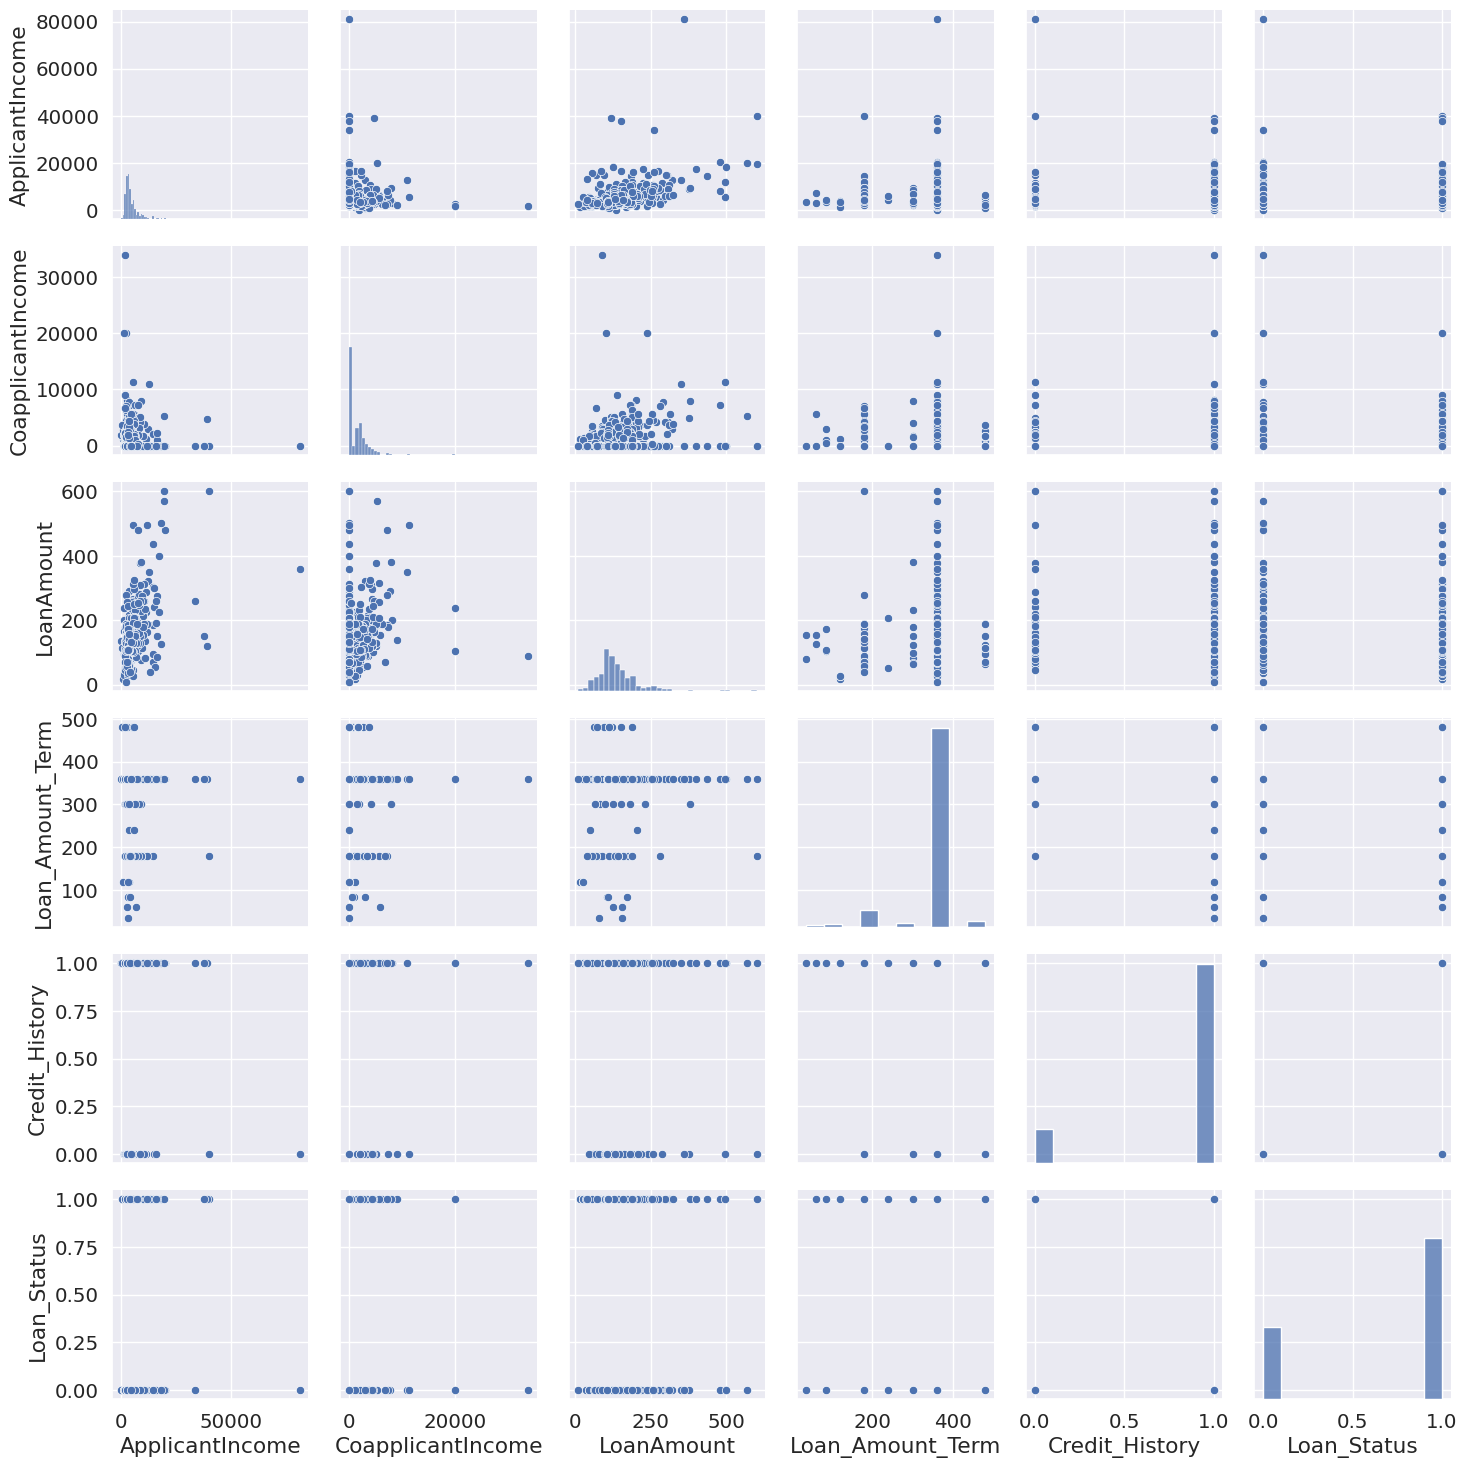

In [ ]:
sns.pairplot(train)
plt.show()

### 2.Correlation

In [ ]:
# Calculating the pearson coefficient
#
# Checking whether you have to define the pearson
coeff = train["LoanAmount"].corr(train["Credit_History"]) 
print(coeff)
# weak negative correlation

-0.040772969328714964


In [ ]:
coeff = train["Loan_Status"].corr(train["ApplicantIncome"]) 
print(coeff)
# Correlation coefficients between -.20 and .20 are generally considered weak,

-0.043151585615539695


In [ ]:
coeff = train["Loan_Status"].corr(train["Loan_Amount_Term"]) 
print(coeff)
# Correlation coefficients between -.20 and .20 are generally considered weak,

-0.007797603799139744


In [ ]:
train.corr() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


correration of financial to the bank is weak correlation of both negative and positive

## Categorical and Categorical

### 1. Stacked Column Chart

In [ ]:
train.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
train[['Loan_Status', 'Education']].plot(kind='bar', figsize=(8, 6), stacked=True)
# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Loan_Status, ApplicantIncome,	CoapplicantIncome" , fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("CoapplicantIncome", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("ApplicantIncome", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

## Categorical and Numerical
### 1. Line Charts

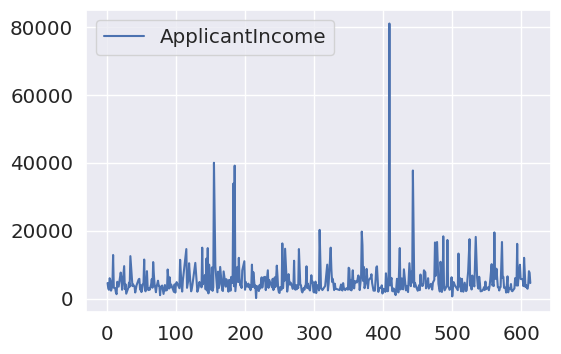

In [ ]:
# Plotting our line graph
train[["ApplicantIncome"]].plot()

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


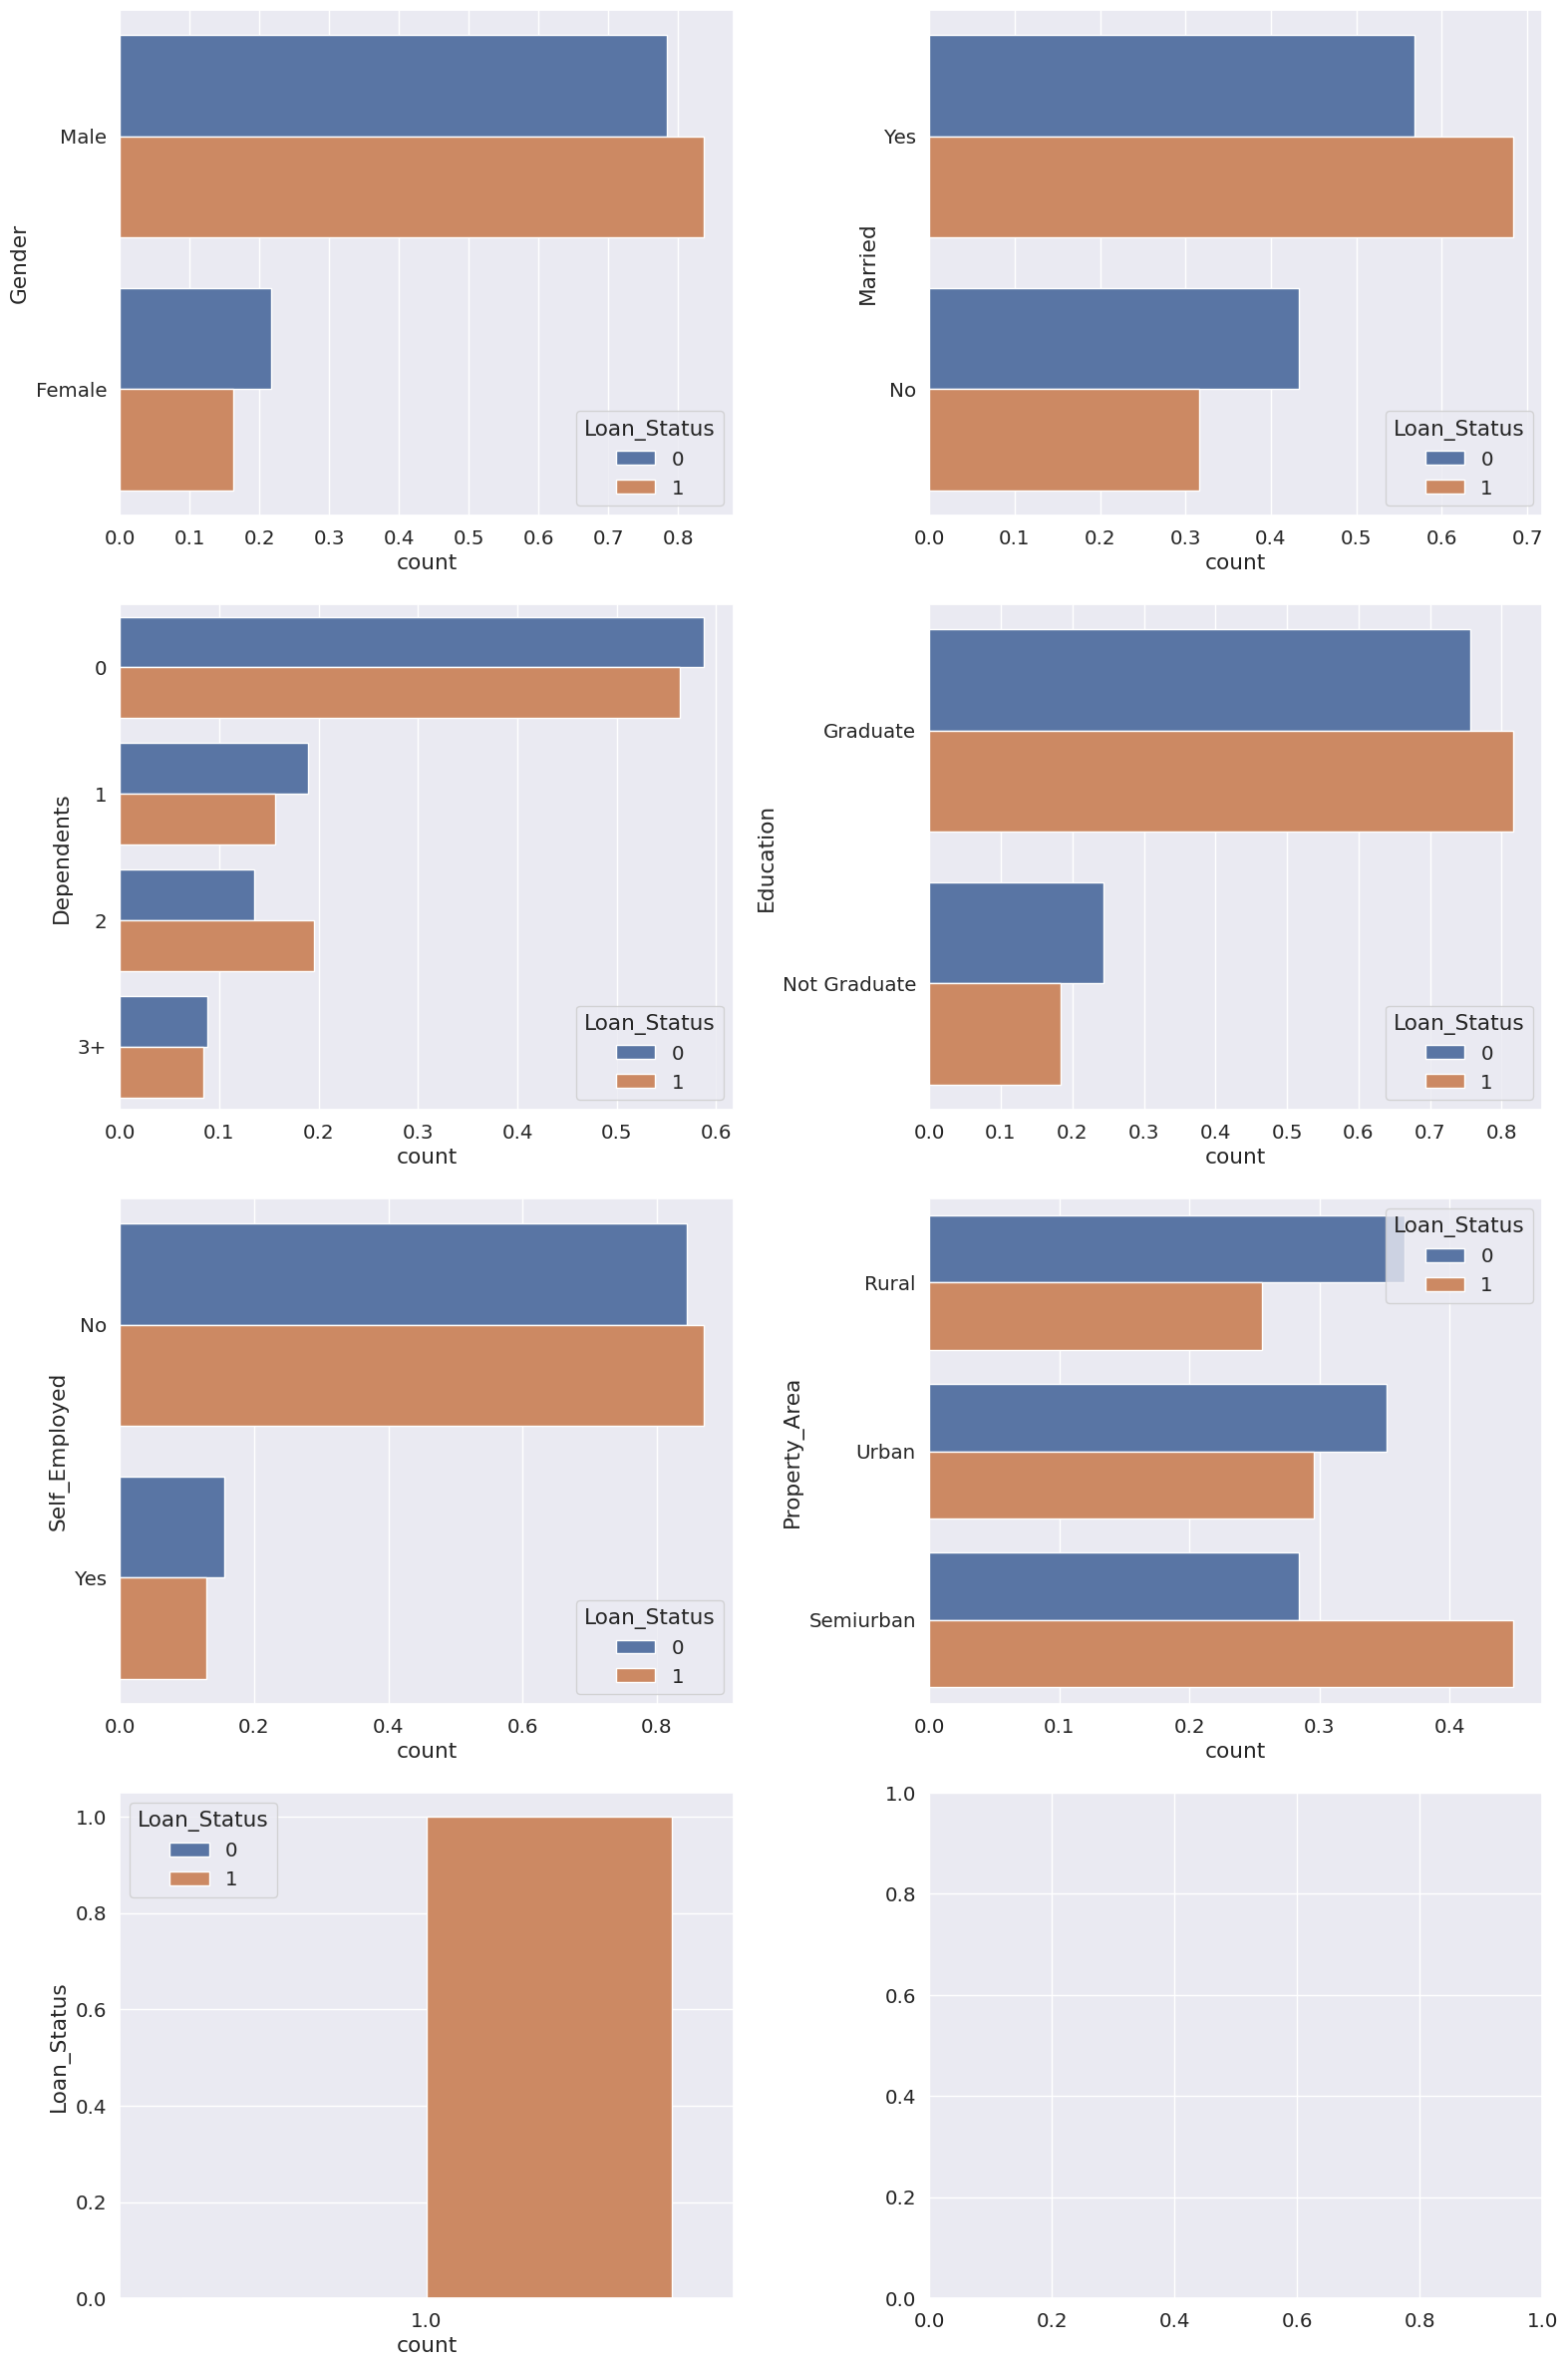

In [ ]:
# bar plot relation w of each colum with bank
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cate_cols]):
    fltr = train[Bank_Loan] == 0

    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)
    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[Bank_Loan] = 0
    vc_b[Bank_Loan] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=Bank_Loan, ax=axes[i])
    
_ = plt.tight_layout()

male have a high percentage of bank account than female both urban rural and with access to cel phone use banks

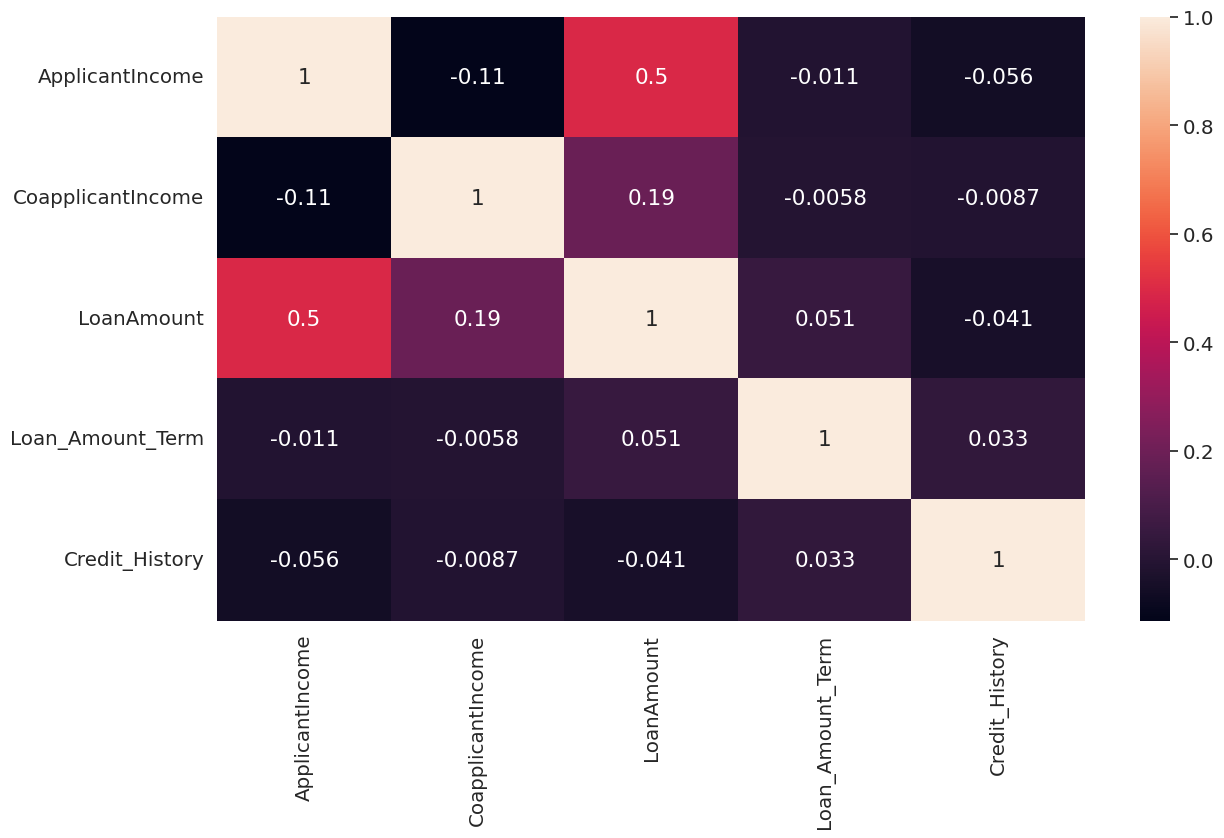

In [ ]:
# heaat map of the numerical column year,household size age
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

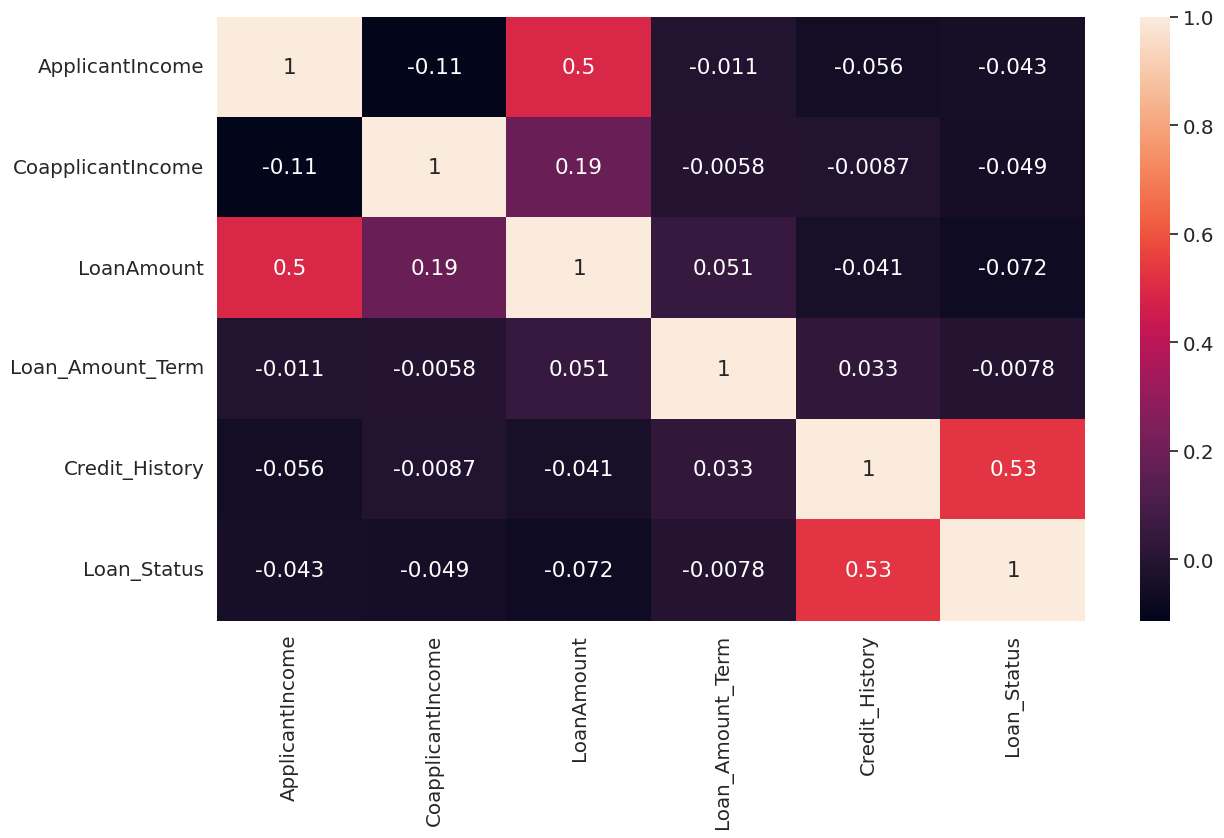

In [ ]:
#heat map with bank Loan users
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols + ['Loan_Status']].corr(), annot=True)

Bivariate Analysis KDE plots - Relationships with Target Variable the bank Loan access.

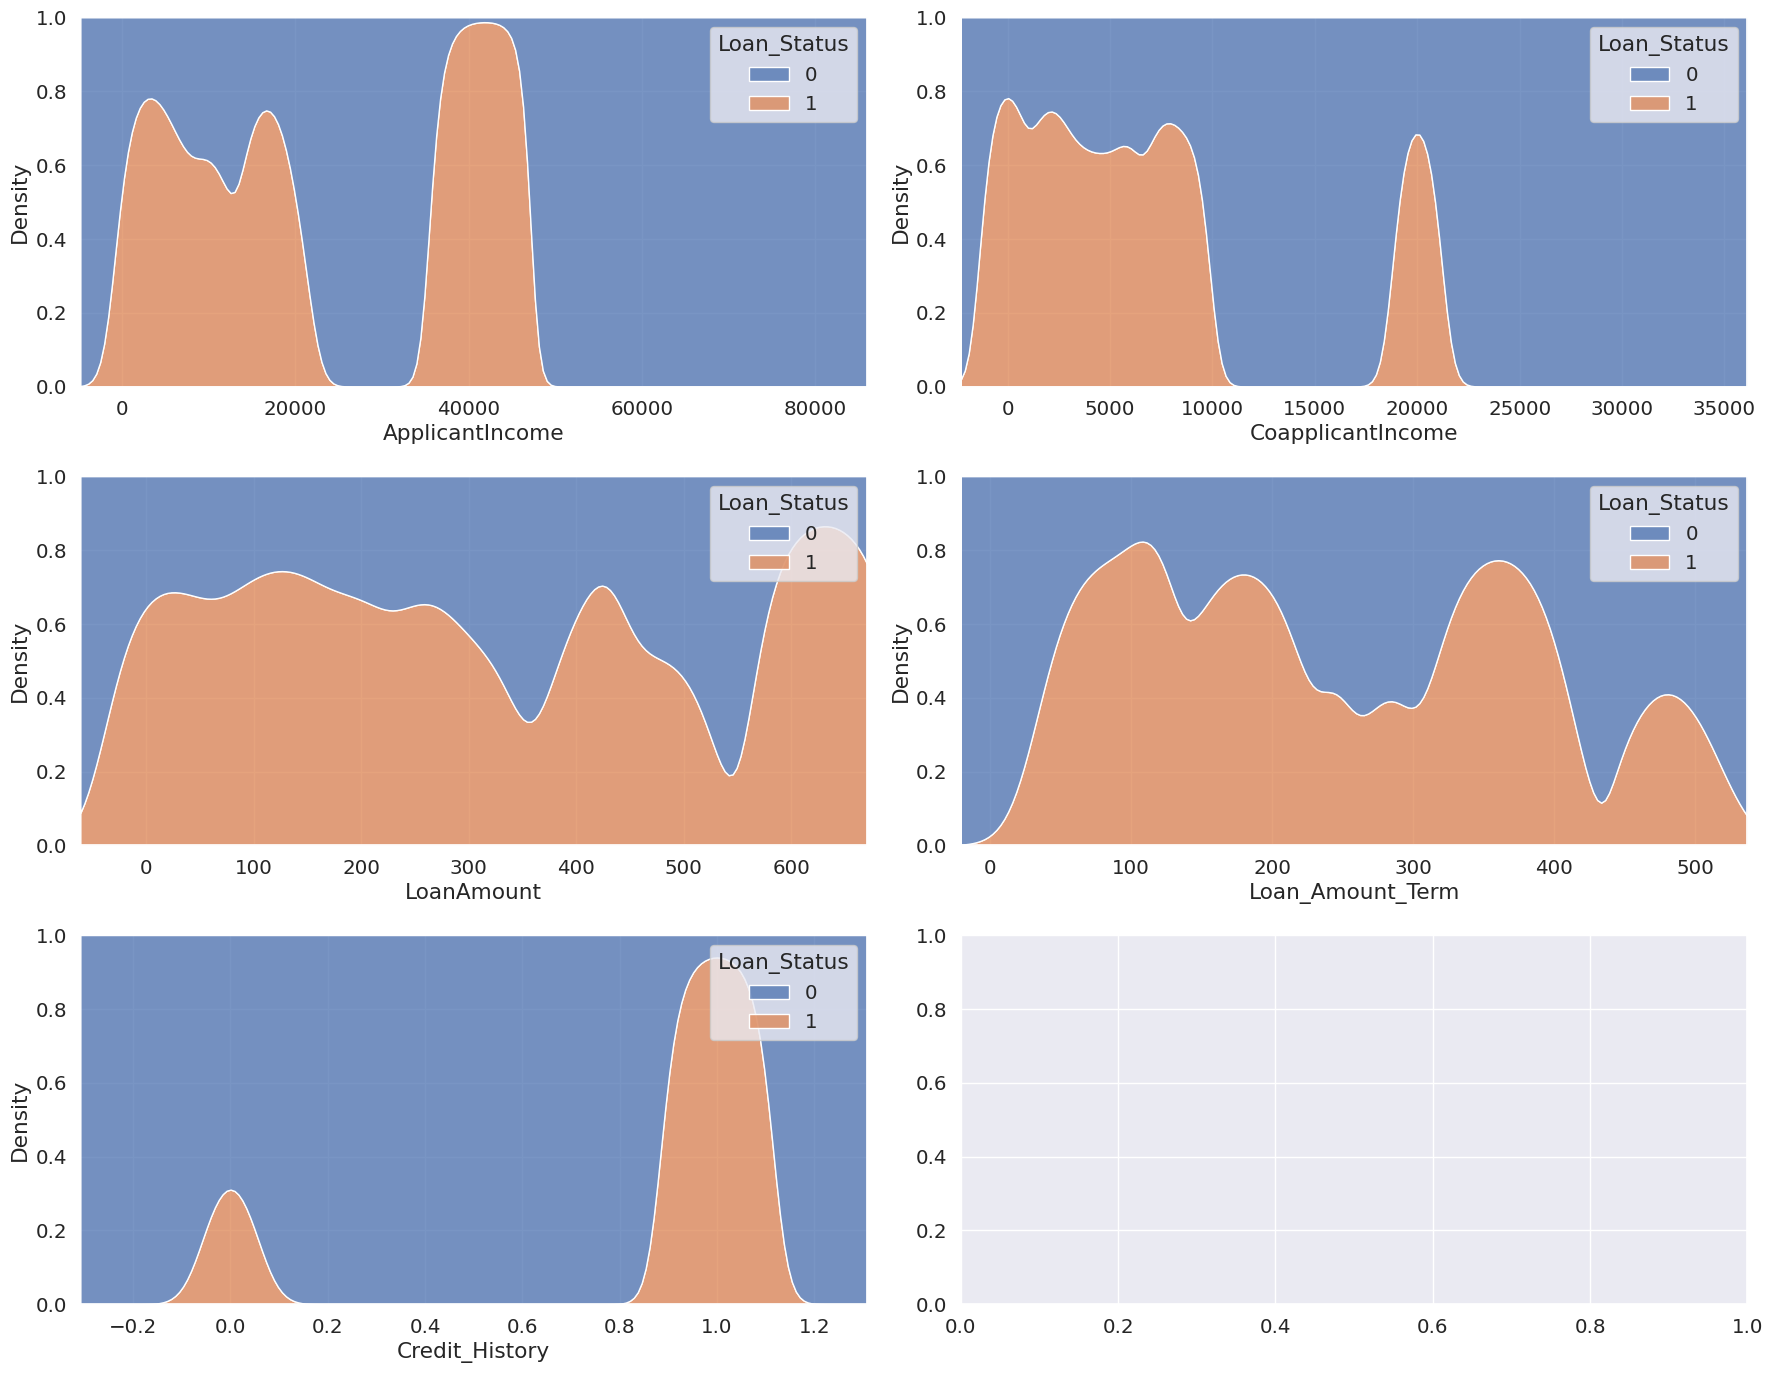

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, hue=Bank_Loan, multiple='fill', ax=axes[i])
plt.tight_layout()

Bivariate Analysis - Horizontal BarPlots

For each numerical Variable. We will plot the median of the numerical variable for:

Has no bank loan == 0

Has a bank loan == 1

We are choosing median since median is not affected by outliers, and our data has a lot of outlers

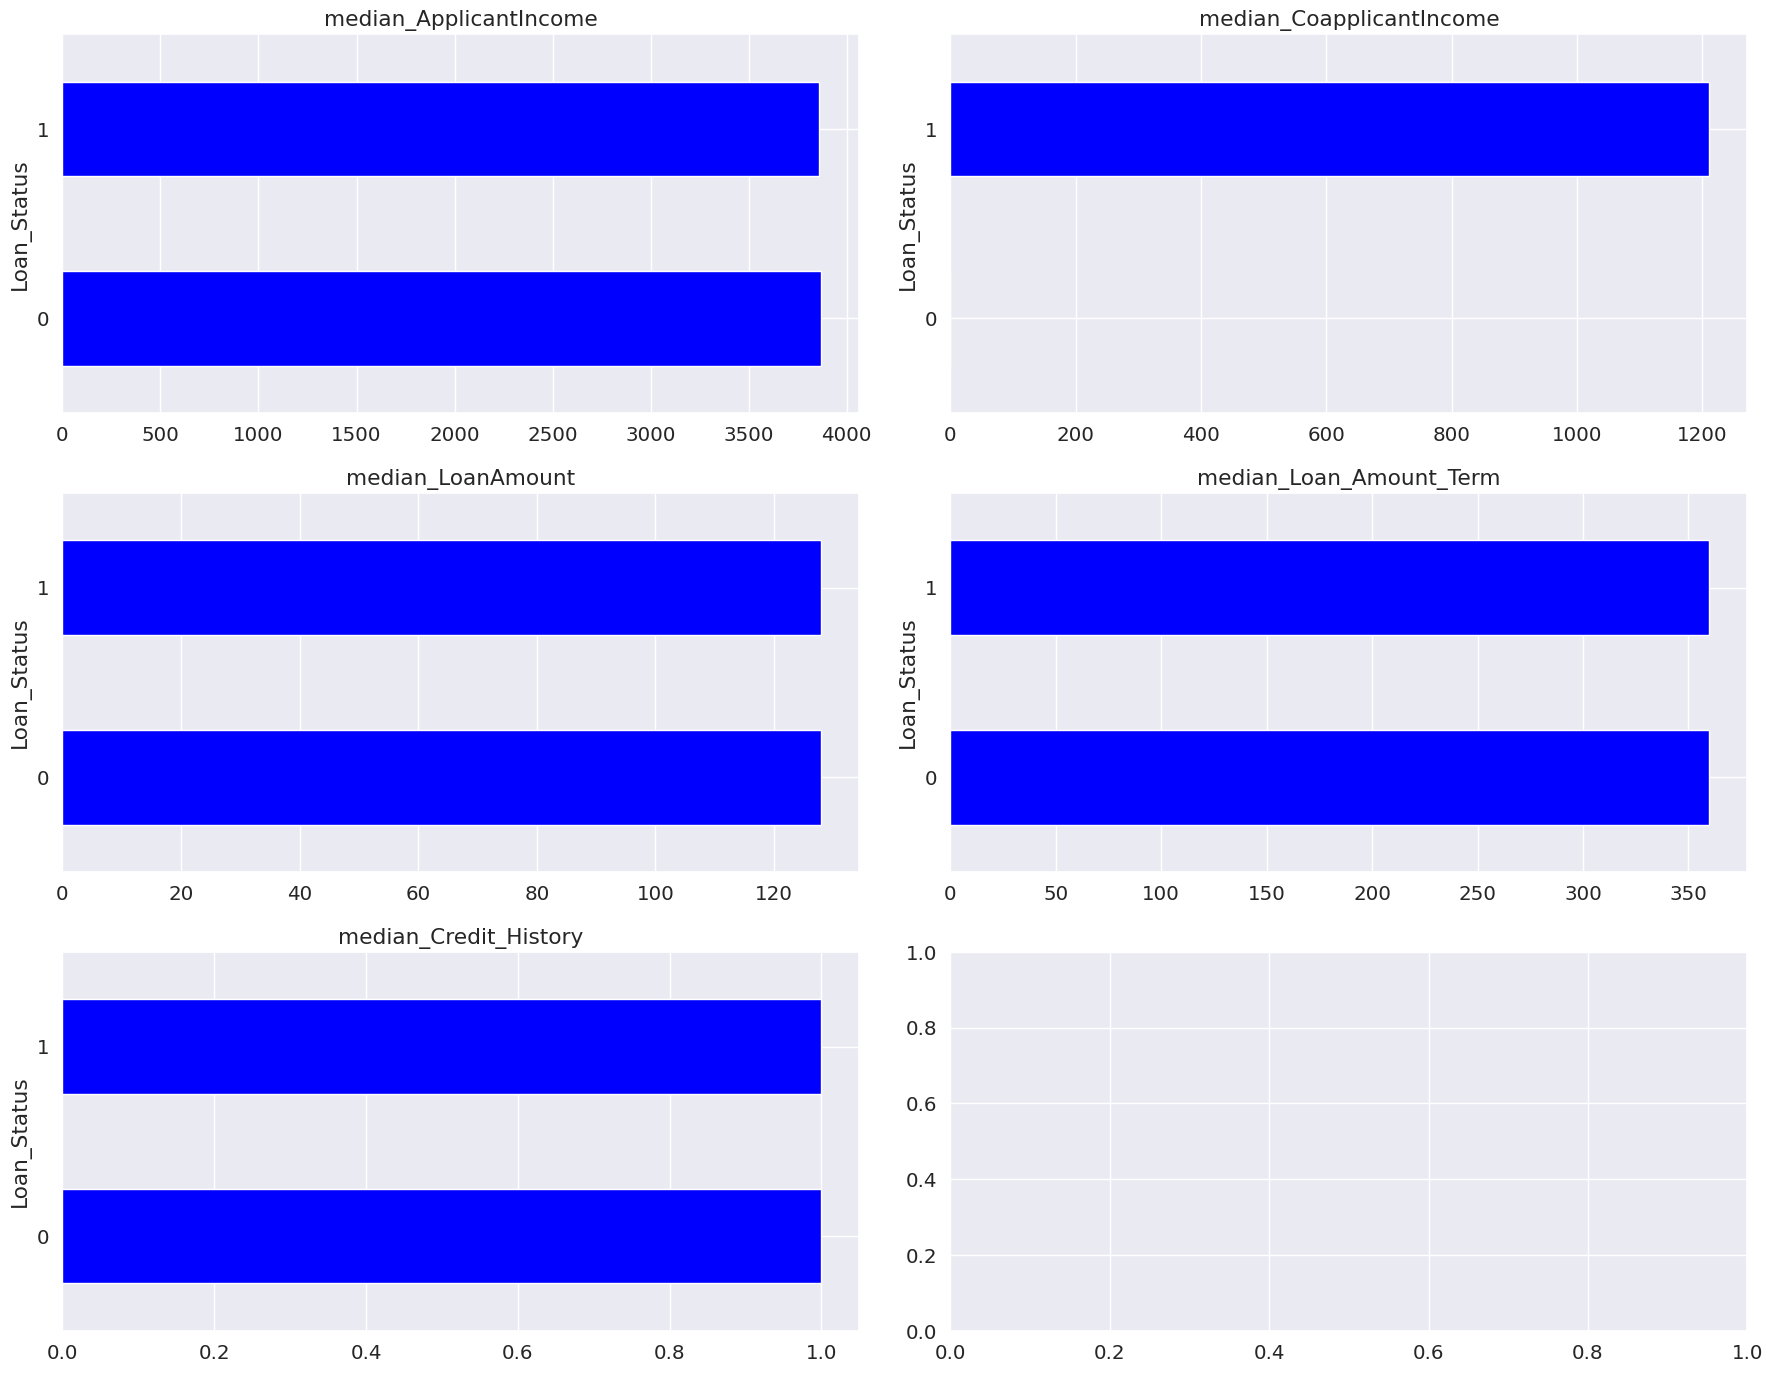

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = train.groupby(Bank_Loan)[c].median().plot(kind = 'barh', title=f'median_{c}', ax=axes[i], color = 'blue')
plt.tight_layout()

Analysis Hypothesis Generation
1. How do women and men compare when it comes to defaulting on loans in the historical dataset?

2. How many of the loan applicants have dependents based on the historical dataset?

3. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

4. Are applicants with a credit history more likely to default than those who do not have one?

5. Is there a correlation between the applicant's income and the loan amount they applied for?

Q. How do women and men compare when it comes to defaulting on loans in the historical dataset?

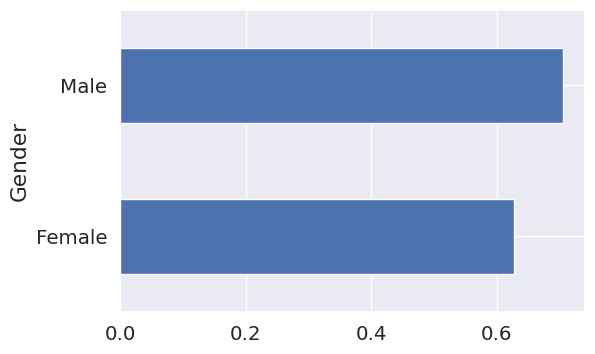

In [ ]:
_ = train.groupby('Gender')[Bank_Loan].mean().sort_values().plot(kind = 'barh')

Men are more likely to get a loan thab female.

Q. How many of the loan applicants have dependents based on the historical dataset?

In [ ]:
# Creating our frequency table
# ---
train.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In respective to the Dependents thoes without take the highest with 274 while the least with 41 as 3+

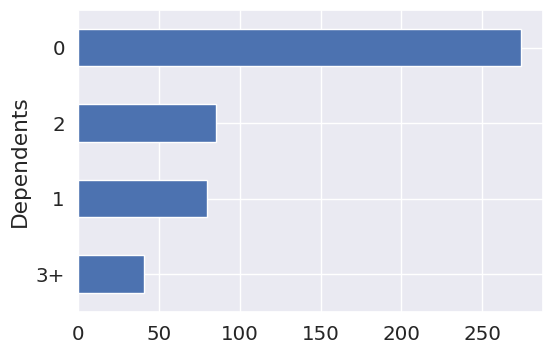

In [ ]:
_ = train.groupby('Dependents')['Loan_ID'].count().sort_values().plot(kind = 'barh')

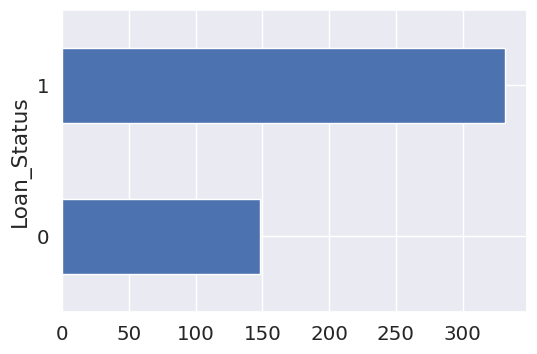

In [ ]:
_ = train.groupby('Loan_Status')['Dependents'].count().sort_values().plot(kind = 'barh')

Q. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

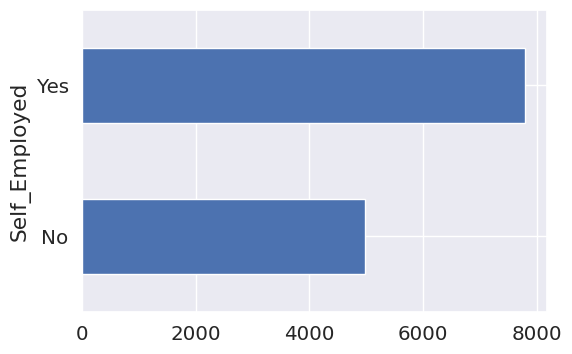

In [ ]:
_ = train.groupby('Self_Employed')['ApplicantIncome'].mean().sort_values().plot(kind = 'barh')

Self_employed have a higher mean income compared to employed

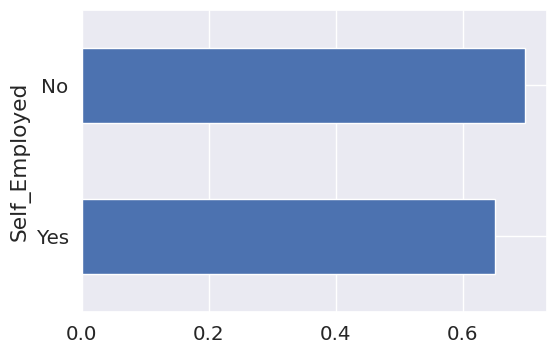

In [ ]:
_ = train.groupby('Self_Employed')[Bank_Loan].mean().sort_values().plot(kind = 'barh')

Despite employed having the minimum income than self_employed they appear to be the most loan access

Q. Are applicants with a credit history more likely to default than those who do not have one?

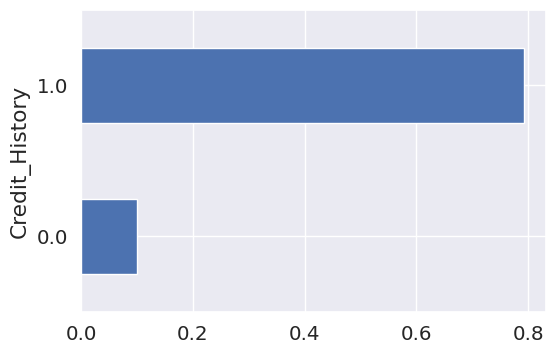

In [ ]:
_ = train.groupby('Credit_History')[Bank_Loan].mean().sort_values().plot(kind = 'barh')

Yes applicants with a credit history are more likely to default to loan

Q.  Is there a correlation between the applicant's income and the loan amount they applied for?

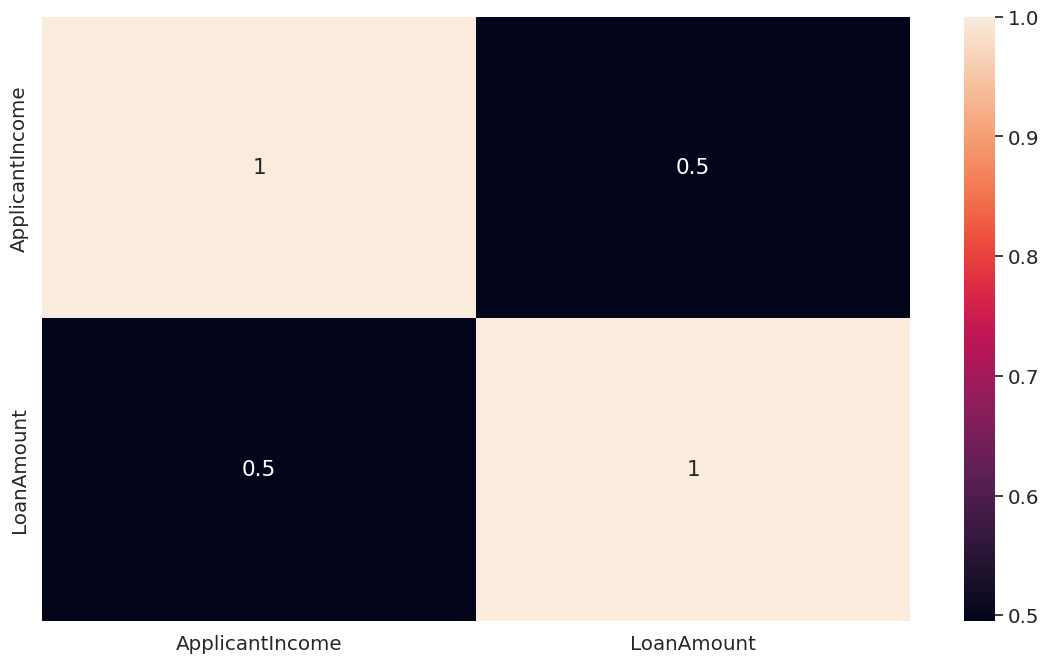

In [ ]:
#heat map with bank Loan users ApplicantIncome	LoanAmount
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[['ApplicantIncome'] + ['LoanAmount']].corr(), annot=True)

Yes as we can see from the above we have a perfect correlation

Q, Do  people living in urban have more chances of having a bank

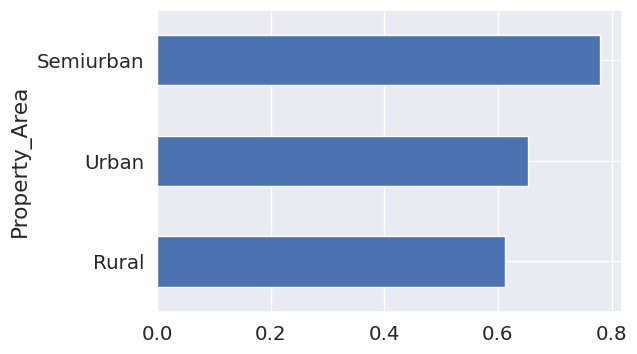

In [ ]:
_ = train.groupby('Property_Area')[Bank_Loan].mean().sort_values().plot(kind = 'barh')

Semiurban  ares are more highly and have bank Loan

Q, Do  people learned have more chances of having a bank Loan

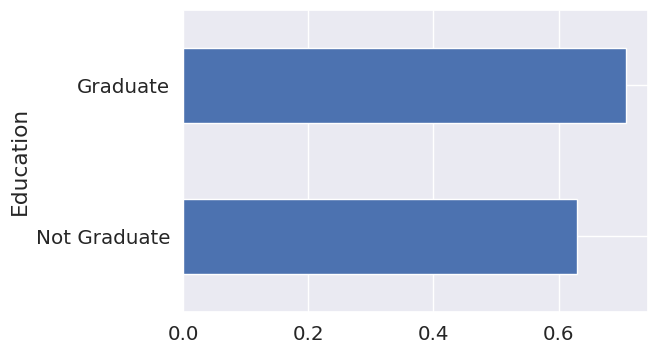

In [ ]:
_ = train.groupby('Education')[Bank_Loan].mean().sort_values().plot(kind = 'barh')

Yes formal education have more chance of having bank loan more likely to be student loans

Q, Do  people with goverment employment have more chances of having a bank

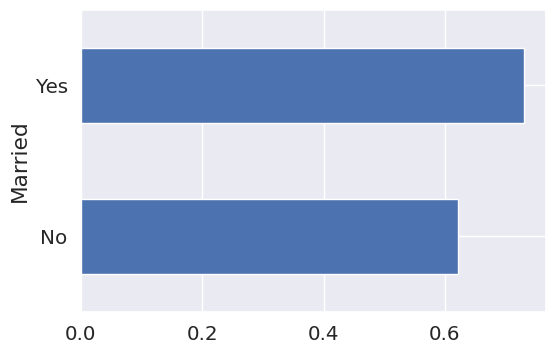

In [ ]:
_ = train.groupby('Married')[Bank_Loan].mean().sort_values().plot(kind = 'barh')

Married people have high chance to have banks

# Part Two

## Auto ML wth autosklearn


In [ ]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status']##.map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.8229166666666666


we can see our accuracy has improved from a Model Accuracy: 0.6504065040650406 to current accuracy of Model Accuracy: 0.8229166666666666

In [ ]:
print(confusion_matrix(predictions_autoML, y_test))

[[11  0]
 [17 68]]


## Bespoke ML sklearn

### Data Preparation

In [ ]:
# Matrix of features

df = train[['Education',
'Property_Area']]

### Include Numerical Features Here ###
### Handle Missing Values Here ###
### Scale Here ###


# label encode target
y = train['Loan_Status']##.map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
X = pd.DataFrame(df, columns=df.columns)
X = pd.get_dummies(X, drop_first=True)

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [ ]:
# train
clf = LogisticRegression() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.7083333333333334


Accuracy imptoved from Model Accuracy: 0.6504065040650406 to Model Accuracy: 0.7083333333333334

In [ ]:
print(confusion_matrix(predictions_clf, y_test))

[[ 0  0]
 [28 68]]


In [ ]:
# train
clf = LogisticRegression() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.7083333333333334


##  Challenging the solution

In [ ]:


# Use the LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)

# Use the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, metric= "minkowski", p=2)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

# Use the SVC
from sklearn.svm import SVC
svc_lin =SVC(kernel="linear", random_state =0)
svc_lin.fit(X_train, y_train)
y_pred3 = svc_lin.predict(X_test)

# Use the SVC rbf
from sklearn.svm import SVC
svc_rbf =SVC(kernel="rbf", random_state =0)
svc_rbf.fit(X_train, y_train)
y_pred4 = svc_rbf.predict(X_test)

# Use the GaussianNB
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred5 = gauss.predict(X_test)

# Use the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier(criterion ="entropy", random_state = 0)
tree.fit(X_train, y_train)
y_pred6 = tree.predict(X_test)

# Use the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion ="entropy", random_state = 0)
forest.fit(X_train, y_train)
y_pred7 = forest.predict(X_test)


print('Logistic Regression Training Acurracy:' + str(accuracy_score(y_test, y_pred1)))
print('K Neigbour  Training Acurracy:' + str(accuracy_score(y_test, y_pred2)))
print('SVC Linear  Training Acurracy:' + str(accuracy_score(y_test, y_pred3)))
print('SVC RBF  Training Acurracy:' + str(accuracy_score(y_test, y_pred4)))
print('Gaussian Regressio  Training Acurracy:' + str(accuracy_score(y_test, y_pred5)))
print('Decision Tree  Training Acurracy:' + str(accuracy_score(y_test, y_pred6)))
print('Random Forest Training Acurracy:' + str(accuracy_score(y_test, y_pred7)))


Logistic Regression Training Acurracy:0.7083333333333334
K Neigbour  Training Acurracy:0.71875
SVC Linear  Training Acurracy:0.7083333333333334
SVC RBF  Training Acurracy:0.7083333333333334
Gaussian Regressio  Training Acurracy:0.7083333333333334
Decision Tree  Training Acurracy:0.7083333333333334
Random Forest Training Acurracy:0.7083333333333334


In [ ]:
# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Creating a list of classifier algorithms to compare with
#
models = [RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), DecisionTreeClassifier(), XGBClassifier(), SVC(), KNeighborsClassifier(),\
          GaussianNB(), LogisticRegression()]

# Creating lists of the algorithms, to store the accuracy scores of each fold
#
RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVC, KNeighbors, GaussianNB, LogisticRegression = ([] for x in range(9))

# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVC, KNeighbors, GaussianNB, LogisticRegression]

# Spliting the data into features and the target variable
#
# Splitting our dataset
#X = df.drop(['classs'], axis=1)
#y = df['classs']

# Encoding the categorical features
#

# label encode target
y = train['Loan_Status']##.map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
X = pd.DataFrame(df, columns=df.columns)
X = pd.get_dummies(X, drop_first=True)

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10)

# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'accuracy', cv = kfold)))
  
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'RandomForest': RandomForest, 'GradientBoosting': GradientBoosting, 'Adaboost': AdaBoost, 'DecisionTree': DecisionTree, 'XGB': XGB,
              'SVC': SVC, 'KNeighbors': KNeighbors, 'GaussianNB': GaussianNB, 'LogisticRegression': LogisticRegression}, index = range(1, 11))

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

# Previewing the scores dataframe
#
scores

,RandomForest,GradientBoosting,Adaboost,DecisionTree,XGB,SVC,KNeighbors,GaussianNB,LogisticRegression
1,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.708333,0.583333,0.625000
2,0.729167,0.729167,0.729167,0.729167,0.729167,0.729167,0.416667,0.687500,0.729167
3,0.604167,0.604167,0.604167,0.604167,0.604167,0.604167,0.666667,0.625000,0.604167
4,0.666667,0.666667,0.729167,0.666667,0.666667,0.666667,0.583333,0.687500,0.729167
5,0.729167,0.729167,0.729167,0.729167,0.729167,0.729167,0.375000,0.750000,0.729167
6,0.687500,0.687500,0.687500,0.687500,0.687500,0.687500,0.375000,0.645833,0.687500
7,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.416667,0.666667,0.666667
8,0.625000,0.625000,0.708333,0.625000,0.625000,0.625000,0.270833,0.625000,0.708333
9,0.729167,0.729167,0.729167,0.729167,0.729167,0.729167,0.520833,0.708333,0.729167
10,0.687500,0.687500,0.708333,0.687500,0.687500,0.708333,0.604167,0.708333,0.708333


In [ ]:
# Finding the model with the highest accuracy
#
scores.loc['mean'].idxmax()

'Adaboost'

In [ ]:
# Finding the model with the least variance from the mean, i.e standard deviation
#
scores.loc['std'].idxmin()

'Adaboost'

##9. Follow up questions

a). Did we have the right question?

Yes the research question was clearly specified

b). Do we need other data to answer our question?

No the data was correct, 

c). Did we have the right data?

Yes the data was correct and with mininal errors

Conclusion

The two approaches Logistic Regression and K Neigbour and Logistic Regression were not the best approach for yielding an accurate model to predict the Loan outcomes hence other Modeling techniques should be considered. From the above analysis on challenging the solution, it can be observed that the *Adaboost* is the optimal model for predicting whether one will have loan draw or not have access to loan.
This is because it has the highest mean of scores and the lowest variance, which makes it the most stable algorithm
